# Catálogo - PAID
II Semestre - 2020

**Estudiantes:**  
Marcelo Sánchez Solano  
Luis López Salas  
Emanuel Esquivel López 

## Lista de contenidos

* [Introducción a imágenes](#leccion1)
    * [Imágenes binarias](#bin_img)
    * [Imágenes a escala de grises](#grayscale_img)
    * [Imágenes a color](#rgb_img)
* [Manejo de videos y SVD](#leccion2)
    * [Guardado de frames en una matriz y creación de video de salida](#frames_matrix)
    * [SVD e imágenes](#svd_img)
    * [Gráfica valores singulares](#singular_svd)
    * [Eliminación de ruido de una imagen](#noise_remove)
    * [Eliminación de ruido usando imágenes de entrenamiento](#noise_training)
* [Transformaciones Geométricas](#transformations)
    * [Traslación](#traslation)
    * [Rotación](#rotation)
        * [Rotación con comandos de Octave y Python](#rotationGNU)
    * [Escalado](#scale)
    * [Rippling](#rippling)
    * [Contraste](#contrast)
    * [Autocontraste](#autocontrast)
    * [Negativo](#negative)
    * [Transformación Gamma](#gamma)
    * [Transformación Logarítmica](#log)
    * [Transformación Por Partes](#parts)
* [Histogramas](#histograms)
    * [Creación del histograma](#hist_create)
    * [Ecualización del histograma](#equalizer)
    * [Estiramiento del histograma](#stretching)
    * [Achicamiento del histograma](#shrinking)
    * [Especificación del histograma](#histmatch)
* [Convolución](#conv)
    * [Convolución en 1D](#conv_1D)
    * [Convolución en 2D](#conv_2D)
* [Filtros en el dominio espacial](#space_domain)
    * [Filtro promedio](#promedio)
    * [Barbara con Filtro promedio](#Lenapromedio)
    * [Filtro Gaussiando](#gaussian)
* [Filtros en el dominio de la frecuencia](#freq)
    * [Transformada Rápida de Fourier](#fft)
* [Procesamiento de Imágenes Morfológicas](#morfo)
    * [Operaciones Morfológicas](#op_morfo)
    * [Dilatación](#dilate)
    * [Erosión](#erode)
    * [Apertura](#apertura)
    * [Algoritmos Morfológicos](#algo_morfo)
        * [Borde Interno](#borde_interno)
        * [Rellenar Huecos](#fill_holes)
        * [Esqueleto](#skel)
    * [Morfología en imágenes a escala de grises](#morfo_bnw)
        * [Top hat y bottom hat](#top_bottom)
* [Transformada de Hough](#hough)
    * [Imágenes binarias](#hough_bin)
    * [Imágenes a escala de grises](#hough_gray)
* [Segmentación de Imágenes](#segmentation)
    * [Umbral compuesto y simple](#threshold)
    * [Umbral e histograma](#thresh_hist)
    * [Umbral Otsu](#otsu)
* [Compresión de Imágenes](#compression)

## Introducción a Imágenes <a class="anchor" id="leccion1"></a>

### Imágenes binarias <a class="anchor" id="bin_img"></a>

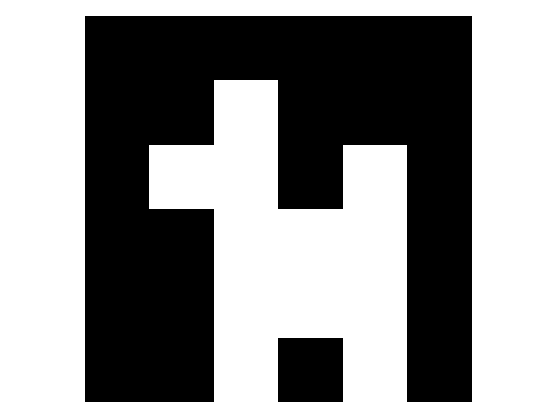

In [2]:
%Ejemplo 1 - Mostrar una imagen binaria con colores invertidos.
clc; clear; close all

A = -[1 1 1 1 1 1;
     1 1 0 1 1 1;
     1 0 0 1 0 1;
     1 1 0 0 0 1;
     1 1 0 0 0 1;
     1 1 0 1 0 1] + 1;
     
imshow(A)

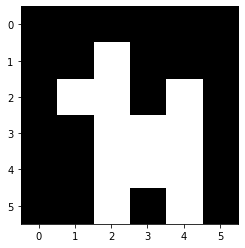

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

A = [[1, 1, 1, 1, 1, 1],
     [1, 1, 0, 1, 1, 1],
     [1, 0, 0, 1, 0, 1],
     [1, 1, 0, 0, 0, 1],
     [1, 1, 0, 0, 0, 1],
     [1, 1, 0, 1, 0, 1]]

A_inv = -1 * np.array(A) + np.ones((6, 6))

bin_img = plt.imshow(A_inv, cmap='gray')
plt.show()

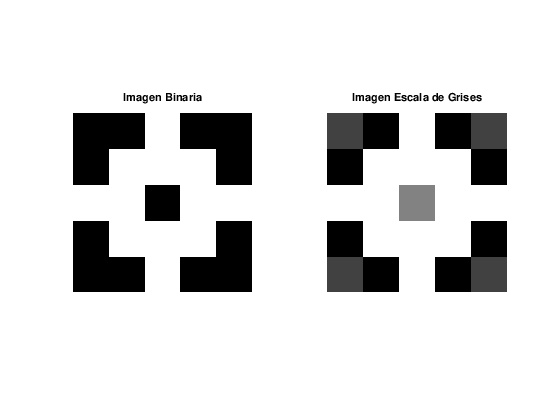

In [4]:
A = [0 0 1 0 0;
     0 1 1 1 0;
     1 1 0 1 1;
     0 1 1 1 0;
     0 0 1 0 0;];
     
subplot(1,2,1)
imshow(A)
title("Imagen Binaria")
     
B = [0.25 0 1 0 0.25;
     0 1 1 1 0;
     1 1 0.5 1 1;
     0 1 1 1 0;
     0.25 0 1 0 0.25;];
     
subplot(1,2,2)
imshow(B)
title("Imagen Escala de Grises")

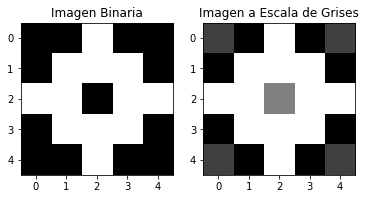

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt


A = [[0, 0, 1, 0, 0],
     [0, 1, 1, 1, 0],
     [1, 1, 0, 1, 1],
     [0, 1, 1, 1, 0],
     [0, 0, 1, 0, 0]]

B = [[0.25, 0, 1, 0, 0.25],
     [0, 1, 1, 1, 0],
     [1, 1, 0.5, 1, 1],
     [0, 1, 1, 1, 0],
     [0.25, 0, 1, 0, 0.25]]

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(A, cmap='gray')
ax1.set_title('Imagen Binaria')

ax2.imshow(B, cmap='gray')
ax2.set_title('Imagen a Escala de Grises')

plt.show()

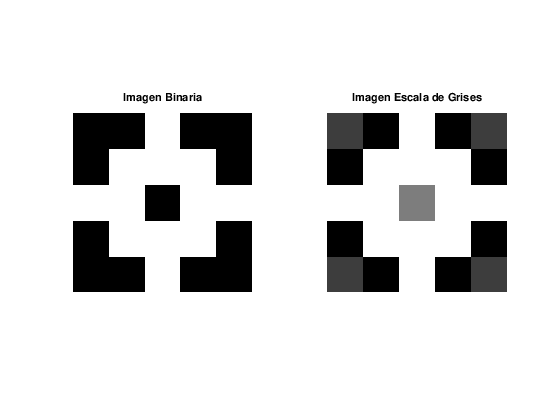

In [6]:
A = [0 0 255 0 0;
     0 255 255 255 0;
     255 255 0 255 255;
     0 255 255 255 0;
     0 0 255 0 0;];
A = uint8(A);
subplot(1,2,1)
imshow(A)
title("Imagen Binaria")
     
B = [63 0 255 0 63;
     0 255 255 255 0;
     255 255 127 255 255;
     0 255 255 255 0;
     63 0 255 0 63;];
B = uint8(B); % convierte un valor en formato de 8 bits.
subplot(1,2,2)
imshow(B)
title("Imagen Escala de Grises")

### Imágenes a escala de grises <a class="anchor" id="grayscale_img"></a>

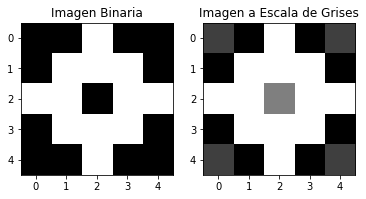

In [7]:
import matplotlib.pyplot as plt
import numpy as np


A = [[0, 0, 255, 0, 0],
     [0, 255, 255, 255, 0],
     [255, 255, 0, 255, 255],
     [0, 255, 255, 255, 0],
     [0, 0, 255, 0, 0]]

B = [[63, 0, 255, 0, 63],
     [0, 255, 255, 255, 0],
     [255, 255, 127, 255, 255],
     [0, 255, 255, 255, 0],
     [63, 0, 255, 0, 63]]

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(A, cmap='gray')
ax1.set_title('Imagen Binaria')

ax2.imshow(B, cmap='gray')
ax2.set_title('Imagen a Escala de Grises')

plt.show()

ans =

   469   469

A_bloque =

  181  183  173  177  159  125  120  112  129  159  186
  175  160  148  141  134  133  145  163  109   78   33
  162  149  155  138  139  157  148  158  165  126   70
  158  142  151  118  128  170  156  161  165  133   68
  136  139  136  125  146  124  152  134  142  112  132
  150  137  146  135  136  128  126  135  129  109  134
  138   81   69   51   65  109  106  146  147  130  159
  130   80   72   52   71  106  100  124  119  116  176
  102  100  106   69   63   39   44   36   39   69  169
   84  103  103   74   72   30   50   20   29   91  175
  112  135  142  152  162  128  129   91   73  162  187

ans = uint8


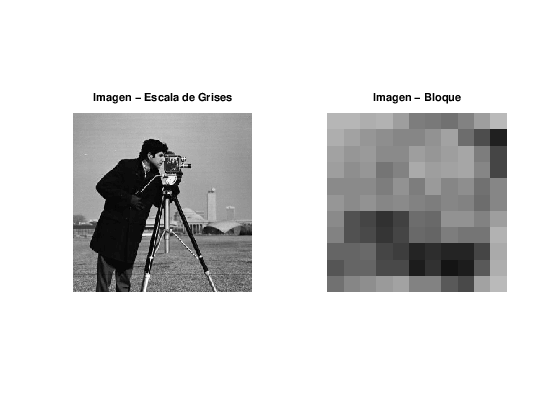

In [8]:
%Cargar una imagen
A = imread('Leccion1\camarografo.jpg');
subplot(1,2,1)
imshow(A)
title("Imagen - Escala de Grises")
size(A)
subplot(1,2,2)
A_bloque = A(125:135, 225:235)
class(A)
imshow(A_bloque)
title("Imagen - Bloque")

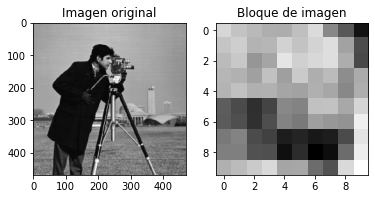

In [9]:
A = plt.imread('Leccion1\\camarografo.jpg')

A_bloque = A[125:135, 225:235]

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(A, cmap='gray')
ax1.set_title('Imagen original')

ax2.imshow(A_bloque, cmap='gray')
ax2.set_title("Bloque de imagen")

plt.show()

### Imágenes a colores <a class="anchor" id="rgb_img"></a>

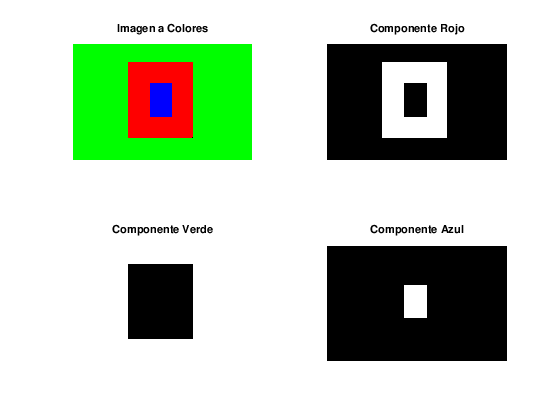

In [10]:
% Ejemplo de una imagen a color
A = imread('Leccion1\rgb_imagen.png');
A = double(A);
subplot(2, 2, 1)
imshow(A)
title("Imagen a Colores")
Ar = A(:, :, 1); % Canal rojo
subplot(2, 2, 2)
imshow(Ar)
title("Componente Rojo")
Ag = A(:, :, 2); % Canal verde
subplot(2, 2, 3)
imshow(Ag)
title("Componente Verde")
Ab = A(:, :, 3); % Canal Azul
subplot(2, 2, 4)
imshow(Ab)
title("Componente Azul")

(303, 470, 3)


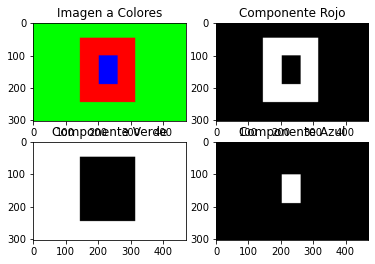

In [11]:
import cv2

rgb_img = cv2.imread("Leccion1\\rgb_imagen.png", cv2.IMREAD_UNCHANGED)
rgb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB)

print(rgb_img.shape)

fig, axs = plt.subplots(2, 2)

red_channel = rgb_img[:, :, 0]
green_channel = rgb_img[:, :, 1]
blue_channel = rgb_img[:, :, 2]

axs[0, 0].imshow(rgb_img)
axs[0, 0].set_title("Imagen a Colores")
axs[0, 1].imshow(red_channel, cmap='gray')
axs[0, 1].set_title("Componente Rojo")
axs[1, 0].imshow(green_channel, cmap='gray')
axs[1, 0].set_title("Componente Verde")
axs[1, 1].imshow(blue_channel, cmap='gray')
axs[1, 1].set_title("Componente Azul")

plt.show()

m =  303
n =  470
r =  3


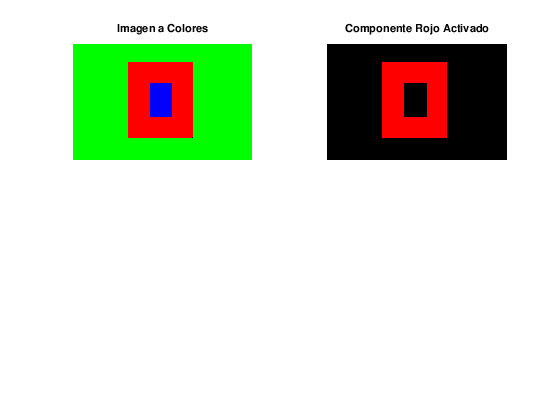

In [12]:
A = imread('Leccion1\rgb_imagen.png');
A = im2double(A);
[m, n, r] = size(A)
subplot(2, 2, 1)
imshow(A)
title("Imagen a Colores")
Ceros = zeros(m, n);

%Canal rojo activado
A_r = zeros(m, n, 3);
A_r(:, :, 1) = A(:, :, 1); %Canal rojo
A_r(:, :, 2) = Ceros;
A_r(:, :, 3) = Ceros;
subplot(2, 2, 2)
imshow(A_r)
title("Componente Rojo Activado")

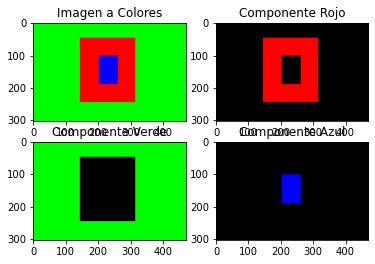

In [13]:
rgb_img = cv2.imread("Leccion1\\rgb_imagen.png", cv2.IMREAD_UNCHANGED)
rgb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(2, 2)

# Red channel activated
red_img = np.zeros(rgb_img.shape)
red_img[:, :, 0] = rgb_img[:, :, 0]

# Green channel activated
green_img = np.zeros(rgb_img.shape)
green_img[:, :, 1] = rgb_img[:, :, 1]

# Blue channel activated
blue_img = np.zeros(rgb_img.shape)
blue_img[:, :, 2] = rgb_img[:, :, 2]

axs[0, 0].imshow(rgb_img)
axs[0, 0].set_title("Imagen a Colores")
axs[0, 1].imshow(red_img.astype(np.uint8))
axs[0, 1].set_title("Componente Rojo")
axs[1, 0].imshow(green_img.astype(np.uint8))
axs[1, 0].set_title("Componente Verde")
axs[1, 1].imshow(blue_img.astype(np.uint8))
axs[1, 1].set_title("Componente Azul")

plt.show()

## Manejo de videos <a class="anchor" id="leccion2"></a>

### Guardado de frames en matriz y creación de video de salida <a class="anchor" id="frames_matrix"></a>

In [14]:
% Ejemplo cargar video

pkg load image
pkg load video

v = VideoReader('Leccion2\video_original.mp4');

fr = v.NumberOfFrames; % cantidad de frames
nf = v.Height; % dimensiones
nc = v.Width;
m = round(nf); % redimensión de video.
n = round(nc);

Y = uint8(zeros(m, n, 3, fr));

% Leer el video y guardar los frames en la matriz Y.

for i = 1 : fr
    Z1 = readFrame(v);
    Y(:, :, 1, i) = imresize(Z1(:, :, 1), [m n]); % Canal rojo
    Y(:, :, 2, i) = imresize(Z1(:, :, 2), [m n]); % Canal verde
    Y(:, :, 3, i) = imresize(Z1(:, :, 3), [m n]); % Canal rojo
end

% Crear un video a partir de un conjunto de imágenes en Y
video = VideoWriter('Leccion2\video_salida2.mp4');

for i = 1 : fr
    writeVideo(video, Y(:,:,:, i));
end

close(video)

'perl' is not recognized as an internal or external command,
operable program or batch file.
error: 'VideoReader' undefined near line 1 column 5
error: 'v' undefined near line 1 column 6
error: 'v' undefined near line 1 column 6
error: 'v' undefined near line 1 column 6
error: 'nf' undefined near line 1 column 11
error: 'nc' undefined near line 1 column 11
error: 'fr' undefined near line 1 column 26
error: 'fr' undefined near line 1 column 13
'perl' is not recognized as an internal or external command,
operable program or batch file.
error: 'VideoWriter' undefined near line 2 column 9
error: 'fr' undefined near line 1 column 13
error: 'video' undefined near line 1 column 7


In [15]:
import numpy as np
import cv2

video_cap = cv2.VideoCapture("Leccion2\\video_original.mp4")

if video_cap.isOpened():
    width = int(video_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frames = int(video_cap.get(cv2.CAP_PROP_FRAME_COUNT))

    Y = np.zeros((height, width, 3, frames)).astype(np.uint8)

    for i in range(frames):
        ret, currFrame = video_cap.read()
        Y[:, :, 0, i] = currFrame[:, :, 0]
        Y[:, :, 1, i] = currFrame[:, :, 1]
        Y[:, :, 2, i] = currFrame[:, :, 2]

    out_video = cv2.VideoWriter('Leccion2\\outpy.avi', cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), 10, (width, height))

    for i in range(frames):
        out_video.write(Y[:, :, :, i])

    video_cap.release()
    out_video.release()

### SVD e Imágenes <a class="anchor" id="svd_img"></a>

k =  50


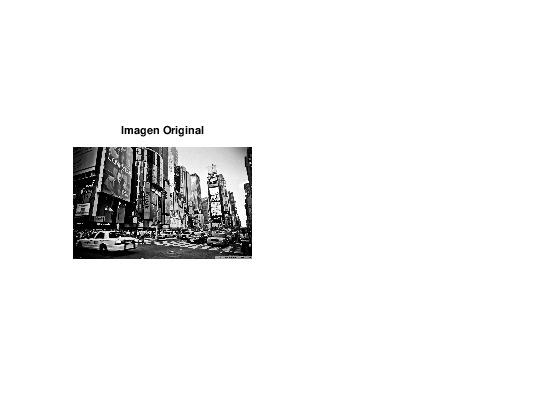

In [16]:
% Ejemplo de SVD en imágenes

% Emanuel

clc; clear; close all

pkg load image

A = imread('Leccion3\imagen1.jpg');
A = im2double(A);

subplot(1, 2, 1)
imshow(A)
title('Imagen Original')

% Nota: cuando aplicamos SVD a una imagen, se recomienda que este en formato double normalizado,
% es decir que toma valores en el intervalo [0, 1]

[U, S, V] = svd(A);
k = 50
Uk = U(:, 1:k); % Tomar primeras k columnas de U
Vk = V(:, 1:k); % Primeras k columnas de V
Sk = S(1:k, 1:k); % Primeras k filas y columnas de S
Ak = Uk*Sk*Vk'; % matriz de rango K que mejor aproxima a A.
%Ak = im2uint8(Ak);
subplot(1, 2, 2)
imshow(Ak)
title('Imagen reconstruida de rango k')

Text(0.5, 1.0, 'Imagen reconstruida con k=45')

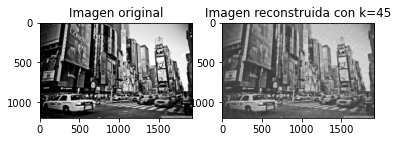

In [17]:
import numpy
import matplotlib.pyplot as plt 
import numpy as np
from matplotlib import image as img

A = img.imread('Leccion3\imagen1.jpg')
A = np.asarray(A)

U, S, V = np.linalg.svd(A)
V = np.transpose(V)
S = np.diag(S)

k=45

Uk = U[:,:k] 
Sk = S[:k,:k] 
Vk = V[:,:k]

Ak = Uk @ Sk @  np.transpose(Vk)

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(A, cmap='gray')
ax1.set_title('Imagen original')
titulo = "Imagen reconstruida con k=" +str(k)
ax2.imshow(Ak, cmap='gray')
ax2.set_title(titulo)

### Gráfica valores singulares <a class="anchor" id="singular_svd"></a>

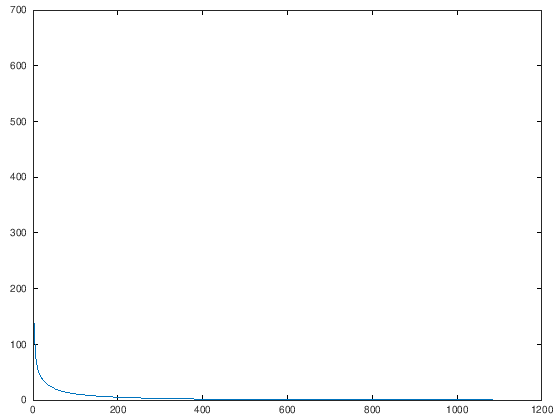

In [18]:
% Ejemplo calculo de valores singulares en una imagen

A = imread('Leccion3\imagen1.jpg');
A = im2double(A);

% Nota: cuando aplicamos SVD a una imagen, se recomienda que este en formato double normalizado,
% es decir que toma valores en el intervalo [0, 1]

s = svd(A);

plot(1:length(s), s) % grafica de valores singulares


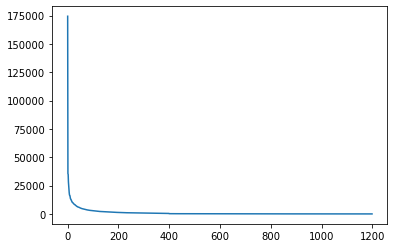

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

image = cv2.imread("Leccion3\\imagen1.jpg", cv2.IMREAD_UNCHANGED)

U, S, V = np.linalg.svd(image)

x_axis = [i for i in range(len(S))]

plt.plot(x_axis, S)
plt.show()

### Eliminación de ruido a una imagen <a class="anchor" id="noise_remove"></a>

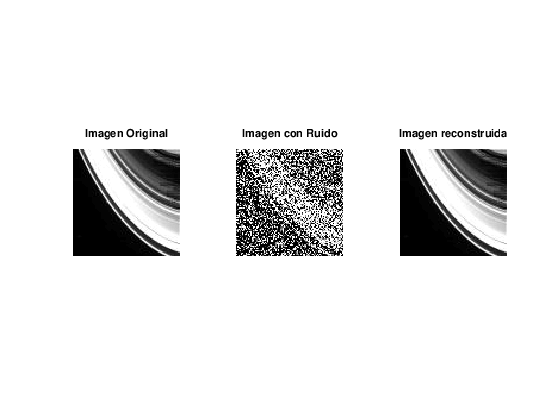

In [20]:
% Ejemplo de como limpiar una imagen con ruido

pkg load image

A = imread('Leccion3\saturno_(5).jpg');
A = im2double(A);
subplot(1, 3, 1)
imshow(A)
title('Imagen Original')

%Agregar ruido
[m, n] = size(A);
N = randn(m, n);
Y = A + N;
Y1 = im2uint8(Y);
subplot(1, 3, 2)
imshow(Y)
title('Imagen con Ruido')

% Crear filtro
F = A * pinv(Y);
Arec = F * Y; % reconstrucción de la imagen
Arec = im2uint8(Arec);
subplot(1, 3, 3)
imshow(Arec)
title('Imagen reconstruida')

Text(0.5, 1.0, 'Imagen reconstruida')

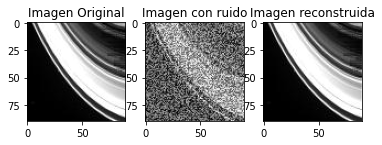

In [21]:
# Ejemplo de como limpiar una imagen con ruido

# Luis
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np

A = cv2.imread('Leccion3\\saturno_(5).jpg', cv2.IMREAD_UNCHANGED);
fig, axs = plt.subplots(1, 3)

#Show original image
axs[0].imshow(A,cmap='gray')
axs[0].set_title("Imagen Original")

#Generate and add noise
Alen = len(A);
noise = 500 * np.random.random((Alen,Alen))
Y = np.add(A,noise)

axs[1].imshow(Y,cmap='gray')
axs[1].set_title("Imagen con ruido")

#Create a filter
F = np.matmul(A,np.linalg.pinv(Y))
Arec = np.matmul(F,Y); #The reconstruction of the image

axs[2].imshow(Arec,cmap='gray')
axs[2].set_title("Imagen reconstruida")

### Eliminación de ruido utilizando imágenes de entrenamiento <a class="anchor" id="noise_training"></a>

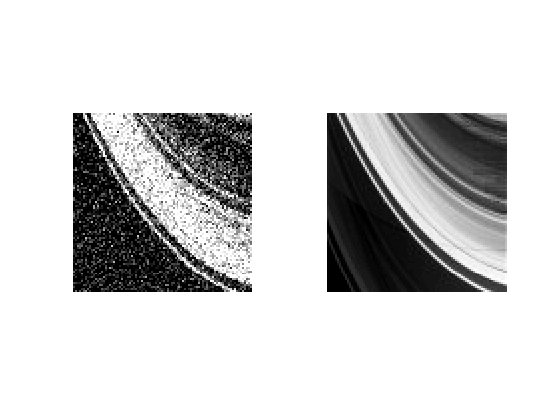

In [22]:
% Limpiar  una imagen usando imágenes de entrenamiento
A = imread('Leccion3\saturno_(1).jpg');
[m, n] = size(A);
s = 20; % numero de muestras
A_bd = zeros(m, n, s);
Y_bd = zeros(m, n, s);

A_bd = zeros(m, n, s);

A = zeros(m * n, s);
Y = zeros(m * n, s);

for i = 1: s
    t = ['Leccion3\saturno_(' num2str(i) ').jpg'];
    Aux = imread(t);
    A_bd(:, :, i) = im2double(Aux); % matrix tamaño mxn
    Y_bd(:, :, i) = A_bd(:, :, i) + 0.25 * randn(m, n); % matrix tamaño mxn
    
    ai = reshape(A_bd(:, :, i), [m*n 1]); % vectorizando matriz
    A(:, i) = ai; % almacenar la imagen vectorizada en A.
    
    yi = reshape(Y_bd(:, :, i), [m*n 1]); % vectorizando matriz
    Y(:, i) = yi; % almacenar la imagen vectorizada en Y.
end

% Calcular el filtro F

F = A * pinv(Y);

% Necesitamos una imagen con ruido que se parezca a las que están en la matriz Y_bd

Y_new_noise = A_bd(:, :, 5) + 0.25 * randn(m, n);
subplot(1, 2, 1)
imshow(Y_new_noise)
% Vectorizar la nueva imagen
y_nr = reshape(Y_new_noise, [m*n 1]);
% Multiplicar por el filtro F
a_rec = F * y_nr;
% Redimensionar el vector como una matriz
A_rec = reshape(a_rec, [m n]);

subplot(1, 2, 2)
imshow(A_rec)

Text(0.5, 1.0, 'Imagen reconstruida')

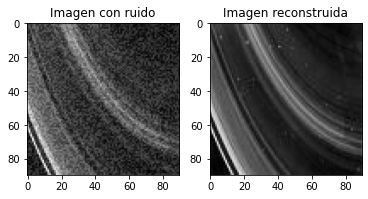

In [23]:
import numpy
import matplotlib.pyplot as plt 
import numpy as np
from matplotlib import image as img

def im2single(M):
    m, n = np.asarray(M).shape
    R = np.zeros((m,n))
    i=0
    while i<m:
        j=0
        while j<n:
            R[i][j] = M[i][j]/255
            j+=1
        i+=1
    return R

A0 = im2single(img.imread('Leccion3\\saturno_(1).jpg').astype(float))
A0 = np.asarray(A0)


s=20

m, n = np.asarray(A0).shape


A = np.zeros((n*m,s))
Y = np.zeros((n*m,s))

A_db = np.zeros((m,n,s))
Y_db = np.zeros((m,n,s))

noise = 0.25* np.random.random((m,n))
for i in range(1,s+1):
    t = im2single(img.imread('Leccion3\\saturno_(' + str(i) + ').jpg').astype(float))
    t = np.asarray(t)
    
    A_db[:,:,i-1] = t
    np.add(A_db[:, :, i-1],noise)
    
    ai = np.reshape(A_db[:, :, i-1],(1,n*m))
    A[:,i-1] = ai
    
    yi = np.reshape(A_db[:, :, i-1],(1,n*m))
    Y[:,i-1] = yi
    
F = A @ np.linalg.pinv(Y)

Y_new_noise = np.add(A_db[:, :, 5],noise)

y_nr =  np.reshape(Y_new_noise,(n*m,1))

a_rec = F @ y_nr

A_rec = np.reshape(a_rec,(m,n))

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(Y_new_noise, cmap='gray')
ax1.set_title('Imagen con ruido')

ax2.imshow(A_rec, cmap='gray')
ax2.set_title("Imagen reconstruida")

## Transformaciones Geométricas <a class="anchor" id="transformations"></a>

### Traslación <a class="anchor" id="traslation"></a>

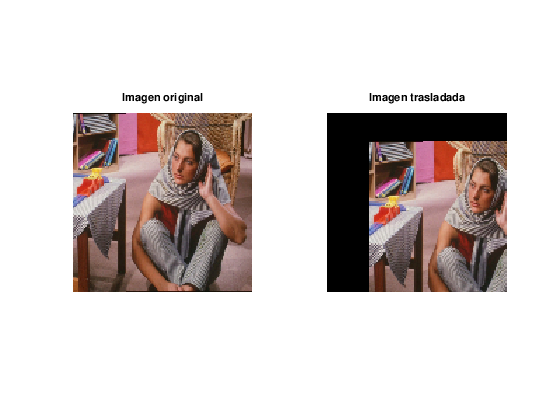

In [24]:
% traslación
pkg load image

% Marcelo

A = imread('Leccion1\barbara.jpg');
A = imresize(A, [128 128]);
subplot(1, 2, 1)
imshow(A)
title('Imagen original')

% Traslacion deltax y deltay de la imagen
deltax = 20; deltay = 30;

[m, n, r] = size(A);

B = uint8(zeros(m, n, r));

for x = 1 : m
    for y = 1 : n
        x_t = x + deltax; % Transformación afín.
        y_t = y + deltay;
        if and(x_t <= m, y_t <= n)
            B(x_t, y_t, :) = A(x, y, :); % Ubicación del píxel A(x, y) en la nueva imagen B
        end
    end
end

subplot(1, 2, 2)
imshow(B)
title('Imagen trasladada')

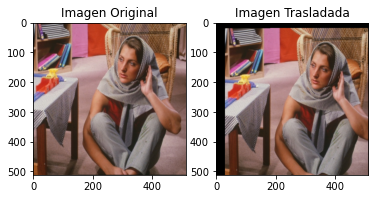

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

A = cv2.imread("Leccion1\\barbara.jpg", cv2.IMREAD_UNCHANGED)
A = cv2.cvtColor(A, cv2.COLOR_BGR2RGB)

deltax = 20
deltay = 30

m, n, r = np.asarray(A).shape

B = np.zeros((m, n, r)).astype(np.uint8)

for x in range(m):
    for y in range(n):
        x_t = x + deltax
        y_t = y + deltay
        if x_t < m and y_t < n:
            B[x_t, y_t, :] = A[x, y, :]


fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(A)
ax1.set_title("Imagen Original")
ax2.imshow(B)
ax2.set_title("Imagen Trasladada")

plt.show()

### Rotación <a class="anchor" id="rotation"></a>

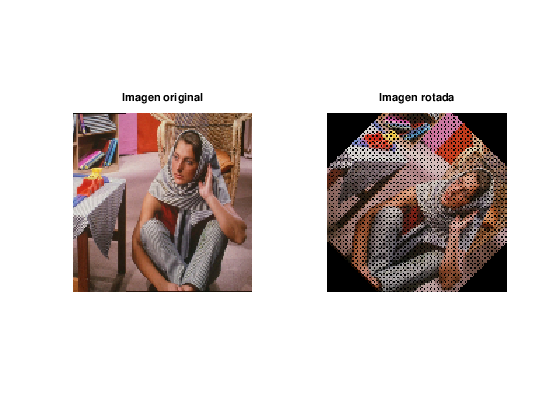

In [26]:
% rotación

pkg load image

A = imread('Leccion1\barbara.jpg');
A = imresize(A, [128 128]);
subplot(1, 2, 1)
imshow(A)
title('Imagen original')

[m, n, r] = size(A);

B = uint8(zeros(m, n, r));
   

angulo = 45;
a0 = cosd(angulo); a1 = sind(angulo);
b0 = -sind(angulo); b1 = cosd(angulo);
xc = floor(m / 2); yc = floor(n / 2); % calculando el centro.

for x = 1 : m
    for y = 1 : n
        x_t = mod(round(a0*(x - xc) + a1*(y - yc) + xc), m); % valor entre 0 y m - 1 MOD m redondeado
        y_t = mod(round(b0*(x - xc) + b1*(y - yc) + yc), n); % valor entre 0 y n - 1 MOD n redondeado
        x_aux = round(a0*(x - xc) + a1*(y - yc) + xc);
        y_aux = round(b0*(x - xc) + b1*(y - yc) + yc);
        if(and(x_t == x_aux, y_t == y_aux))
            B(x_t + 1, y_t + 1, :) = A(x, y, :); % suma 1 por indexación de octave. 
        end
    end
end

subplot(1, 2, 2)
imshow(B) %aplicar filtro de mediana aquí para quitar los puntos negros
title('Imagen rotada')

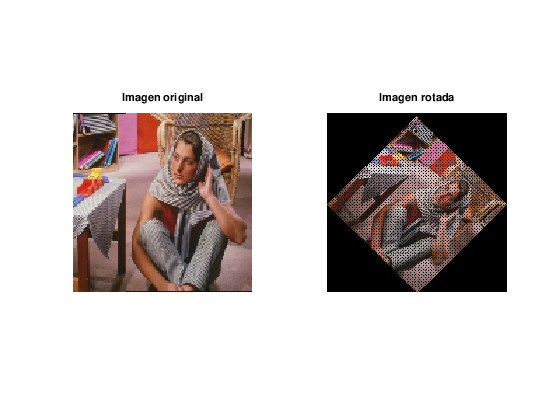

In [27]:
% rotación

pkg load image

A = imread('Leccion1\barbara.jpg');
A = imresize(A, [128 128]);
subplot(1, 2, 1)
imshow(A)
title('Imagen original')

[m, n, r] = size(A);

m_0 = round(sqrt(m^2+n^2)); n_0 = round(sqrt(n^2+m^2)); 
B = uint8(zeros(m_0, n_0, r));
Z = uint8(zeros(m_0, n_0, r));

for x = 1 : m
    for y = 1 : n
        x_t = x+round((m_0-m)/2);
        y_t = y+round((m_0-m)/2);

        Z(x_t, y_t, :) = A(x, y, :);
    end
end
[m, n, r] = size(B);     

angulo = 45;
a0 = cosd(angulo); a1 = sind(angulo);
b0 = -sind(angulo); b1 = cosd(angulo);
xc = floor(m / 2); yc = floor(n / 2); % calculando el centro.

for x = 1 : m
    for y = 1 : n
        x_t = mod(round(a0*(x - xc) + a1*(y - yc) + xc), m); % valor entre 0 y m - 1 MOD m redondeado
        y_t = mod(round(b0*(x - xc) + b1*(y - yc) + yc), n); % valor entre 0 y n - 1 MOD n redondeado
        x_aux = round(a0*(x - xc) + a1*(y - yc) + xc);
        y_aux = round(b0*(x - xc) + b1*(y - yc) + yc);
        if(and(x_t == x_aux, y_t == y_aux))
            B(x_t + 1, y_t + 1, :) = Z(x, y, :); % suma 1 por indexación de octave. 
        end
    end
end

subplot(1, 2, 2)
imshow(B) %aplicar filtro de mediana aquí para quitar los puntos negros
title('Imagen rotada')

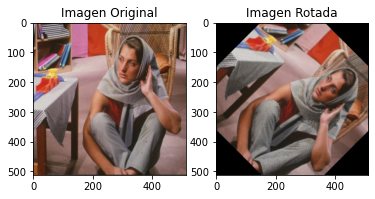

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage, misc

A = plt.imread("Leccion1\\barbara.jpg")

m, n, r = A.shape

B = np.zeros(A.shape).astype(np.uint8)

angle = 45

# parámetros
a0 = np.cos(np.deg2rad(angle))
a1 = np.sin(np.deg2rad(angle))
b0 = -np.sin(np.deg2rad(angle))
b1 = np.cos(np.deg2rad(angle))

# Calcular el centro
xc = np.floor(m / 2)
yc = np.floor(n / 2)

for x in range(m):
    for y in range(n):
        x_t = int(np.mod(round(a0*(x - xc) + a1*(y - yc) + xc), m))
        y_t = int(np.mod(round(b0*(x - xc) + b1*(y - yc) + yc), n))
        x_aux = int(round(a0 * (x - xc) + a1 * (y - yc) + xc))
        y_aux = int(round(b0 * (x - xc) + b1 * (y - yc) + yc))

        if x_t == x_aux and y_t == y_aux:
            B[x_t, y_t, :] = A[x, y, :]

# Elimina ruido
B = ndimage.median_filter(B, 3)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(A)
ax1.set_title("Imagen Original")
ax2.imshow(B)
ax2.set_title("Imagen Rotada")

plt.show()


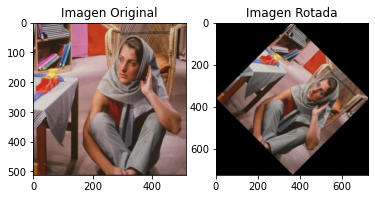

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import ndimage, misc

A = plt.imread("Leccion1\\barbara.jpg")

m, n, r = A.shape

#new

m_0 = round(math.sqrt(m**2+n**2))
n_0 = round(math.sqrt(m**2+n**2))



B = np.zeros((m_0,n_0,r)).astype(np.uint8)

Z = np.zeros((m_0,n_0,r)).astype(np.uint8)

for x in range(m):
    for y in range(n):
        x_t = x+round((m_0-m)/2)
        y_t = y+round((n_0-n)/2)
        Z[x_t, y_t, :] = A[x, y, :]

angle = 45

m, n, r = Z.shape

# parámetros
a0 = np.cos(np.deg2rad(angle))
a1 = np.sin(np.deg2rad(angle))
b0 = -np.sin(np.deg2rad(angle))
b1 = np.cos(np.deg2rad(angle))

# Calcular el centro
xc = np.floor(m / 2)
yc = np.floor(n / 2)

for x in range(m):
    for y in range(n):
        x_t = int(np.mod(round(a0*(x - xc) + a1*(y - yc) + xc), m))
        y_t = int(np.mod(round(b0*(x - xc) + b1*(y - yc) + yc), n))
        x_aux = int(round(a0 * (x - xc) + a1 * (y - yc) + xc))
        y_aux = int(round(b0 * (x - xc) + b1 * (y - yc) + yc))
        if x_t == x_aux and y_t == y_aux:
            B[x_t, y_t, :] = Z[x, y, :]

# Elimina ruido
B = ndimage.median_filter(B, 3)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(A)
ax1.set_title("Imagen Original")
ax2.imshow(B)
ax2.set_title("Imagen Rotada")

plt.show()

#### Rotación con comandos <a class="anchor" id="rotationGNU"></a>

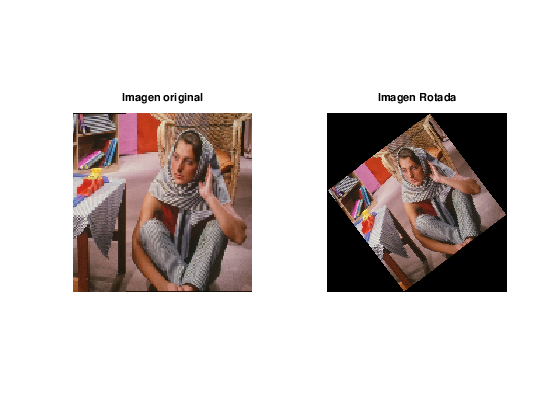

In [30]:
pkg load image

A = imread('Leccion1\barbara.jpg');
A = imresize(A, [128 128]);
subplot(1, 2, 1)
imshow(A)
title('Imagen original')

B = imrotate(A, 37);

subplot(1, 2, 2)
imshow(B)
title('Imagen Rotada')

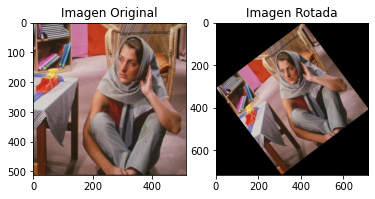

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import ndimage

A = plt.imread("Leccion1\\barbara.jpg")

B = ndimage.rotate(A, 37, reshape=True)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(A, cmap='gray')
ax1.set_title("Imagen Original")
ax2.imshow(B, cmap='gray')
ax2.set_title("Imagen Rotada")
plt.show()

### Escalado <a class="anchor" id="scale"></a>

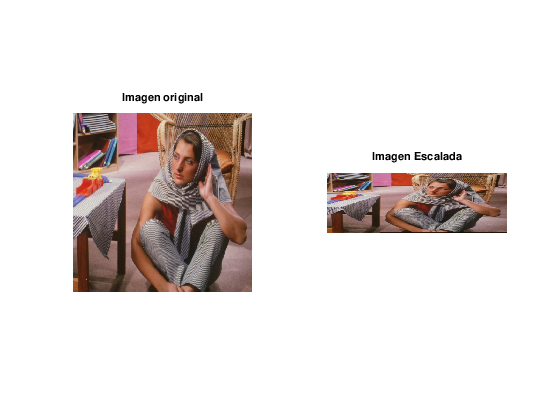

In [32]:
pkg load image

A = imread('Leccion1\barbara.jpg');

subplot(1, 2, 1)
imshow(A)
title('Imagen original')

[m, n, r] = size(A);

sx = 0.5;
sy = 1.5;

new_width = m * sx;
new_height = n * sy;

B = uint8(zeros(new_width, new_height, r));

for x = 1 : new_width
    for y = 1 : new_height
        x_src = min([round(x / new_width * m) m-1]);
        y_src = min([round(y / new_height * n) n-1]);
        B(x+1, y+1, :) = A(x_src+1, y_src+1, :);
    end
end

subplot(1, 2, 2)
imshow(B) %aplicar filtro de mediana aquí para quitar los puntos negros
title('Imagen Escalada')

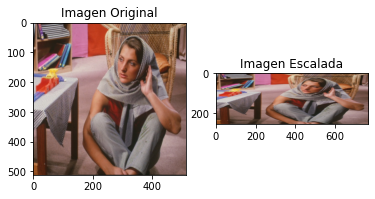

In [33]:
import matplotlib.pyplot as plt
import numpy as np

A = plt.imread("Leccion1\\barbara.jpg")

m, n, r = A.shape

sx = 0.5
sy = 1.5

new_width = int(m * sx)
new_height = int(n * sy)

B = np.zeros((new_width, new_height, r), np.uint8)

for x in range(new_width):
    for y in range(new_height):
        x_src = min(int(round(float(x) / float(new_width) * float(m))), m - 1)
        y_src = min(int(round(float(y) / float(new_height) * float(n))), n - 1)
        B[x, y, :] = A[x_src, y_src, :]


fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(A)
ax1.set_title("Imagen Original")
ax2.imshow(B)
ax2.set_title("Imagen Escalada")
plt.show()

### Rippling <a class="anchor" id="rippling"></a>

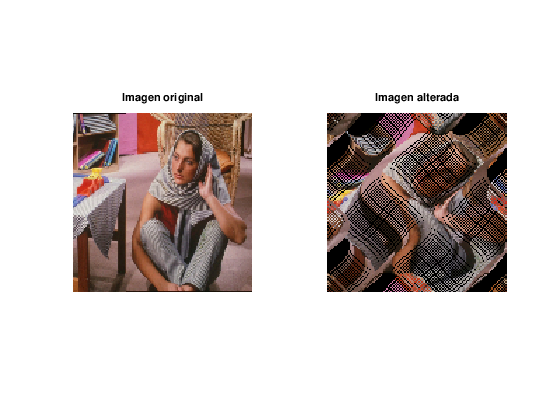

In [34]:
pkg load image

% Transformación Rippling

A = imread('Leccion1\barbara.jpg');
A = imresize(A, [128 128]);
subplot(1, 2, 1)
imshow(A)
title('Imagen original')

[m, n, r] = size(A);
B = uint8(zeros(m, n, r));

Ax = 15; Ay = 15; Lx = 75; Ly = 75;

for x = 1 : m
    for y = 1 : n
        x_t = mod(round(x + Ax*sin(2*pi*y / Lx)), m); % valor entre 0 y m - 1 MOD m redondeado
        y_t = mod(round(y + Ay*sin(2*pi*x / Ly)), n); % valor entre 0 y n - 1 MOD n redondeado
        B(x_t + 1, y_t + 1, :) = A(x, y, :);
    end
end

subplot(1, 2, 2)
imshow(B) %aplicar filtro de mediana aquí para quitar los puntos negros
title('Imagen alterada')

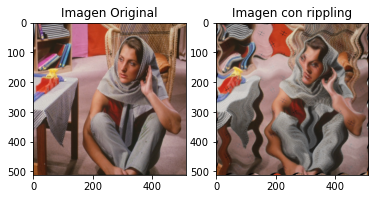

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage, misc

A = plt.imread("Leccion1\\barbara.jpg")

m, n, r = A.shape

B = np.zeros(A.shape).astype(np.uint8)

Ax = 7
Ay = 7
Lx = 75
Ly = 75

for x in range(m):
    for y in range(n):
        x_t = int(np.mod(round(x + Ax * np.sin(2 * np.pi * y / Lx)), m))
        y_t = int(np.mod(round(y + Ay * np.sin(2 * np.pi * x / Ly)), n))
        B[x_t, y_t, :] = A[x, y, :]

B = ndimage.median_filter(B, 3)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(A)
ax1.set_title("Imagen Original")
ax2.imshow(B)
ax2.set_title("Imagen con rippling")

plt.show()

### Contraste <a class="anchor" id="contrast"></a>

error: the import function is not yet implemented in Octave
error: called from
    import at line 56 column 3
error: the import function is not yet implemented in Octave
error: called from
    import at line 56 column 3
error: the import function is not yet implemented in Octave
error: called from
    import at line 56 column 3


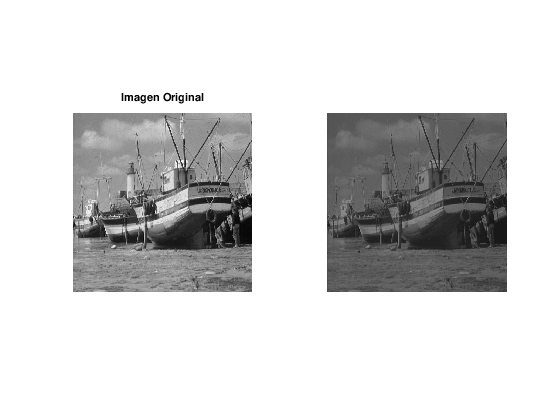

In [36]:
pkg load image
% Contraste

A = imread('Leccion4\boat.jpg');
subplot(1, 2, 1)
imshow(A)
title("Imagen Original")

[m, n] = size(A);

A = double(A);
B = zeros(m, n);

c = 0.5; b = 20;

%for x = 1 : m
%    for y = 1 : n
%        B(x, y) = c * A(x, y) + b;
%    end
%end

B = c * A + b;

B = uint8(B);

subplot(1, 2, 2)
imshow(B)
import matplotlib.pyplot as plt
import numpy as np
import cv2title("Imagen Modificada")

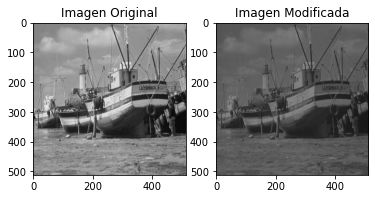

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

A = cv2.imread("Leccion4\\boat.jpg", cv2.IMREAD_UNCHANGED)

m, n = np.asarray(A).shape

c = 0.5
b = np.full((m, n), 20)

B = np.multiply(c, np.asarray(A)) + b
B = B.astype(np.uint8)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(A, cmap='gray')
ax1.set_title('Imagen Original')
ax2.imshow(B, cmap='gray', vmin=0, vmax=255)
ax2.set_title('Imagen Modificada')

plt.show()


### Autocontraste <a class="anchor" id="autocontrast"></a>

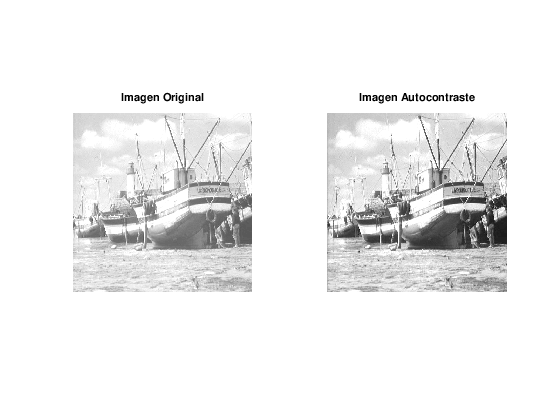

In [38]:
% Efecto de autocontraste

A = imread('Leccion4\boat_new.jpg');
subplot(1, 2, 1)
imshow(A)
title("Imagen Original")

[m, n] = size(A);

A = double(A);

rmax = max(max(A));
rmin = min(min(A));

c = (255 / (rmax - rmin));
b = -c * rmin;
B = c*A + b;

B = uint8(B);

subplot(1, 2, 2)
imshow(B)
title("Imagen Autocontraste")

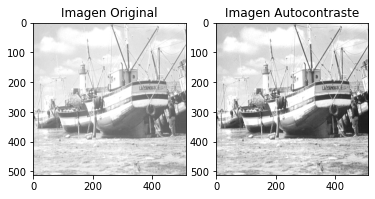

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

A = cv2.imread("Leccion4\\boat_new.jpg", cv2.IMREAD_UNCHANGED)
A = np.asarray(A)

m, n = np.asarray(A).shape

rmax = np.amax(A);
rmin = np.amin(A);

c = (255 / (rmax - rmin))
b = -c * rmin
B = c * A + np.full((m, n), b)

B = B.astype(np.uint8)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(A, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Imagen Original')
ax2.imshow(B, cmap='gray', vmin=0, vmax=255)
ax2.set_title('Imagen Autocontraste')

plt.show()

### Negativo <a class="anchor" id="negative"></a>

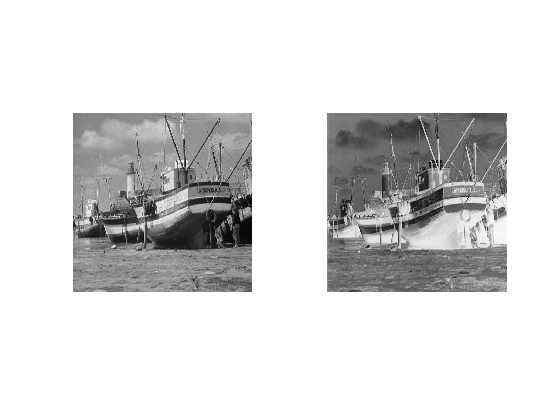

In [40]:
% Negativo de una imagen

pkg load image

A = imread('Leccion4\boat.jpg');

B = 255 - A;

subplot(1, 2, 1)
imshow(A)
subplot(1, 2, 2)
imshow(B)

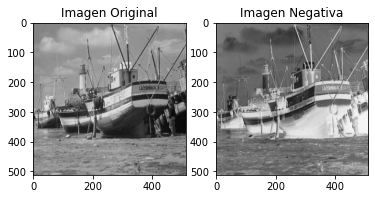

In [41]:
import matplotlib.pyplot as plt
import numpy as np

A = plt.imread("Leccion4\\boat.jpg")

B = np.subtract(np.full(A.shape, 255), A).astype(np.uint8)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(A, cmap='gray')
ax1.set_title("Imagen Original")
ax2.imshow(B, cmap='gray')
ax2.set_title("Imagen Negativa")

plt.show()

### Transformación Gamma <a class="anchor" id="gamma"></a>

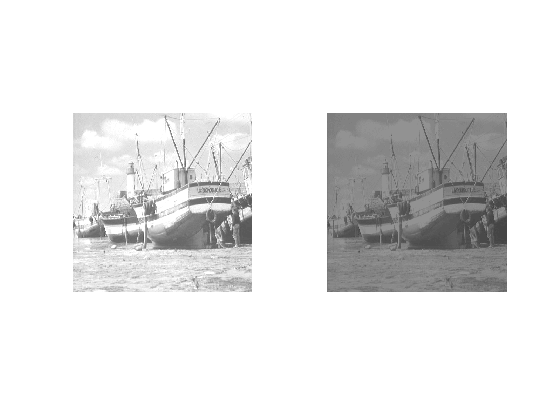

In [42]:
pkg load image

A = imread('Leccion4\boat_new.jpg');

A = double(A);
c = 3; gamma = 0.7;
% si c > 1 aclara / c < 1 oscurece /
B = c*A.^gamma; % .^ eleva puntualmente cada una de las entradas de A

B = uint8(B);

subplot(1, 2, 1)
imshow(uint8(A))
subplot(1, 2, 2)
imshow(B)

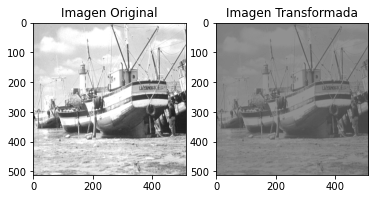

In [43]:
import matplotlib.pyplot as plt
import numpy as np

A = plt.imread("Leccion4\\boat_new.jpg").astype(float)

c = 3
gamma = 0.7

B = c * A ** gamma

B = B.astype(np.uint8)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(A, cmap='gray')
ax1.set_title("Imagen Original")
ax2.imshow(B, cmap='gray', vmin=0, vmax=255)
ax2.set_title("Imagen Transformada")

plt.show()

### Transformación Logarítmica <a class="anchor" id="log"></a>

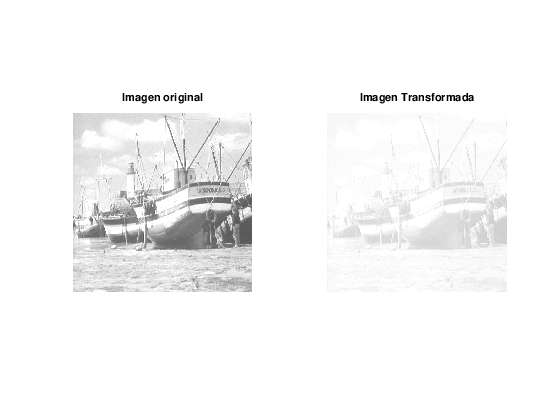

In [44]:
pkg load image

A = imread('Imagenes5/boat.jpg');
subplot(1, 2, 1)
imshow(A)
title('Imagen original')

[m, n] = size(A);
B = uint8(zeros(m, n));

c = 255 / log(1 + 255);

for x = 1 : m
    for y = 1 : n
        B(x, y) = c * log(1 + A(x, y));
    end
end

subplot(1, 2, 2)
imshow(B)
title('Imagen Transformada')

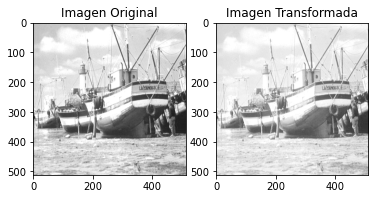

In [45]:
import matplotlib.pyplot as plt
import numpy as np

A = plt.imread("Imagenes5\\boat.jpg")

m, n = A.shape

B = np.zeros(A.shape, np.uint8)
c = 255 / (np.log(1 + 255))

for x in range(m):
    for y in range(n):
        B[x, y] = c * np.log(1 + A[x, y])

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(A, cmap='gray')
ax1.set_title("Imagen Original")
ax2.imshow(B, cmap='gray')
ax2.set_title("Imagen Transformada")
plt.show()

### Transformación por partes <a class="anchor" id="parts"></a>

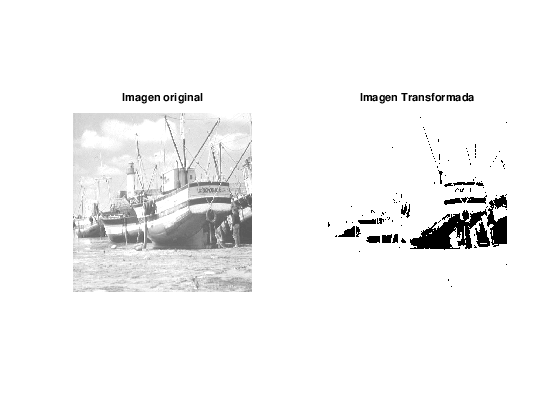

In [46]:
pkg load image

A = imread('Imagenes5/boat.jpg');
subplot(1, 2, 1)
imshow(A)
title('Imagen original')

[m, n] = size(A);
B = uint8(zeros(m, n));

for x = 1 : m
    for y = 1 : n
        if (A(x, y) >= 127)
            B(x, y) = 255;
        else
            B(x, y) = 0;
        end
    end
end

subplot(1, 2, 2)
imshow(B)
title('Imagen Transformada')

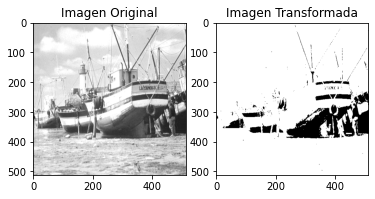

In [47]:
import matplotlib.pyplot as plt
import numpy as np

A = plt.imread("Imagenes5\\boat.jpg")

m, n = A.shape

B = np.zeros(A.shape, np.uint8)

for x in range(m):
    for y in range(n):
        if A[x, y] >= 127:
            B[x, y] = 255
        else:
            B[x, y] = 0

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(A, cmap='gray')
ax1.set_title("Imagen Original")
ax2.imshow(B, cmap='gray')
ax2.set_title("Imagen Transformada")
plt.show()

## Histogramas <a class="anchor" id="histograms"></a>

### Creación del histograma <a class="anchor" id="hist_create"></a>

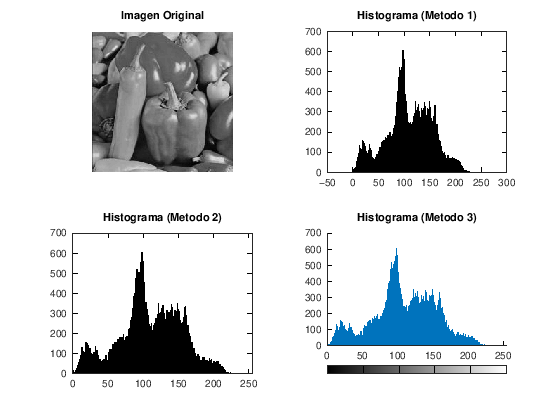

In [48]:
% histograma

% Emanuel

pkg load image

A = imread('Imagenes5/peppers.jpg');

subplot(2, 2, 1)
imshow(A)
title('Imagen Original')

% Forma 1 de calcular el histogram: fuerza bruta
h1 = zeros(256, 1); 
[m, n] = size(A);

for x = 1:m
    for y = 1:n
        h1(A(x, y) + 1) = h1(A(x, y) + 1) + 1;
    end
end

subplot(2, 2, 2)
bar(0:255, h1)
title('Histograma (Metodo 1)')

%forma 2
h2 = zeros(256, 1); 

for i = 0:255
    h2(i+1) = sum(sum(A == i));
end


subplot(2, 2, 3)
bar(0:255, h2)
xlim([0 255])
title('Histograma (Metodo 2)')

subplot(2, 2, 4)
imhist(A);
title('Histograma (Metodo 3)')

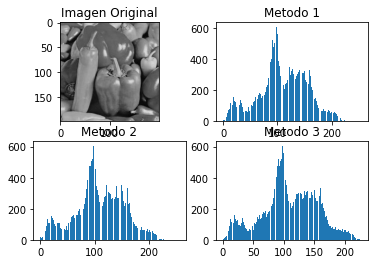

In [49]:
import matplotlib.pyplot as plt
import numpy as np

A = plt.imread("Imagenes5\\peppers.jpg").astype(float)


# Forma 1 de calcular el histogram: fuerza bruta
h1=np.zeros(255)
h2=np.zeros(255)

m, n = A.shape
for i in range(m):
    for j in range(m):
        h1[int(A[i,j])] = h1[int(A[i,j])] + 1

for i in range (255):
    h2[i] = sum(sum(A == i))

x=range(255)

fig, axs = plt.subplots(2, 2)
axs[0,0].imshow(A, cmap='gray', vmin=0, vmax=255)
axs[0,0].set_title("Imagen Original")
axs[0,1].bar(x, h1, align='center')
axs[0,1].set_title("Metodo 1")
axs[1,0].bar(x, h2, align='center')
axs[1,0].set_title("Metodo 2")
axs[1,1].hist(A.ravel(), bins=256)
axs[1,1].set_title("Metodo 3")
plt.show()

### Ecualización del histograma <a class="anchor" id="equalizer"></a>

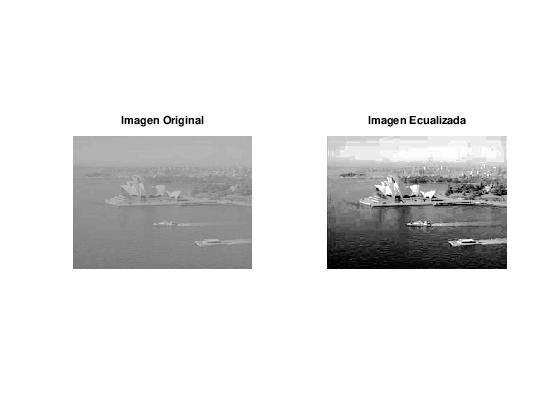

In [50]:
% Ecualización del histograma
pkg load image

A = imread('Imagenes5/sydney.jpg');

subplot(1, 2, 1)
imshow(A)
title('Imagen Original')

% Forma 1 de calcular el histogram: fuerza bruta
h = zeros(256, 1); 
[m, n] = size(A);

for i = 0:255
    h(i+1) = sum(sum(A == i));
end

% Distribución acumulado
ac = zeros(256, 1);

for i = 0:255
    ac(i+1) = sum(h(1:i+1)) / (m*n);
end

% obtener la nueva imagen aplicando la ecualizacion

A = double(A);
B = zeros(m, n);

for x=1:m
    for y=1:n
        B(x, y) = round(ac(A(x, y) + 1) * 255);
    end
end

B = uint8(B);

subplot(1,2,2)
imshow(B)
title('Imagen Ecualizada')

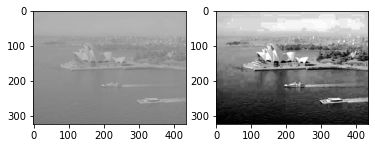

In [51]:
import matplotlib.pyplot as plt
import numpy as np

A = plt.imread("Imagenes5\\sydney.jpg").astype(float)

# Forma 1 de calcular el histogram: fuerza bruta
h=np.zeros(255)
m, n = A.shape

for i in range (255):
    h[i] = sum(sum(A == i))

# Distribución acumulado
ac = np.zeros(255);
for i in range(255):
    ac[i] = sum(h[1:i]) / (m*n);

# Obtener la nueva imagen aplicando la ecualizacion

A = A.astype(int);
B = np.zeros((m, n));

for x in range(m):
    for y in range(n):
        B[x, y] = np.round(ac[A[x, y]] * 255);

fig, axs = plt.subplots(1, 2)
axs[0].imshow(A, cmap='gray', vmin=0, vmax=255)
axs[1].imshow(B, cmap='gray', vmin=0, vmax=255)
plt.show()

### Estiramiento del histograma <a class="anchor" id="stretching"></a>

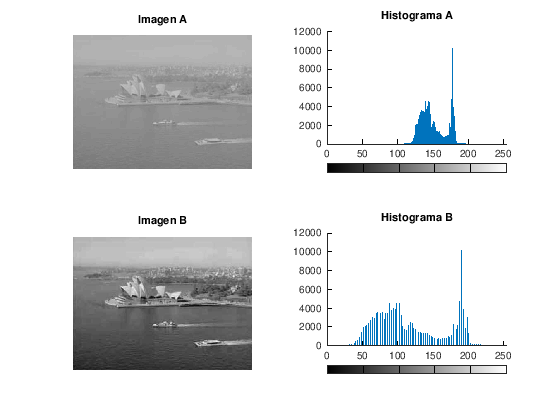

In [52]:
% estiramiento del histograma

pkg load image

A = imread('Imagenes5/sydney.jpg');

subplot(2, 2, 1)
imshow(A)
title('Imagen A')

subplot(2,2,2)
imhist(A)
title('Histograma A')

A = double(A);
r_min = min(min(A));
r_max = max(max(A));

B = (255/(r_max - r_min)) * (A-r_min);
B = uint8(B);

subplot(2, 2, 3)
imshow(B)
title('Imagen B')

subplot(2,2,4)
imhist(B)
title('Histograma B')


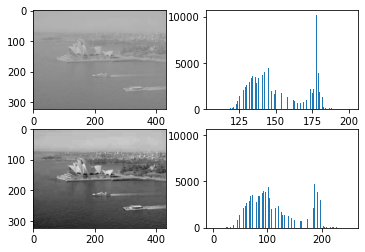

In [53]:
import matplotlib.pyplot as plt
import numpy as np

A = plt.imread("Imagenes5\\sydney.jpg").astype(float)

rmax = np.amax(A)
rmin = np.amin(A)

B = (255/(rmax - rmin)) * (A - np.full(A.shape, rmin))
B = B.astype(np.uint8)

fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(A, cmap='gray', vmin=0, vmax=255)
axs[0, 1].hist(A.ravel(), bins=256)
axs[1, 0].imshow(B, cmap='gray', vmin=0, vmax=255)
axs[1, 1].hist(B.ravel(), bins=256)

plt.show()


### Achicamiento del histograma <a class="anchor" id="shrinking"></a>

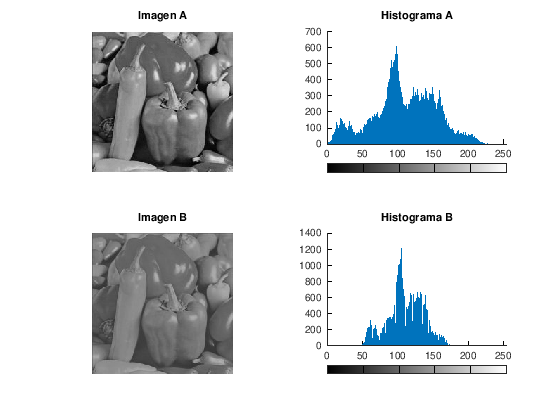

In [54]:
pkg load image

A = imread('Imagenes5/peppers.jpg');

subplot(2, 2, 1)
imshow(A)
title('Imagen A')

subplot(2,2,2)
imhist(A)
title('Histograma A')

A = double(A);
r_min = min(min(A));
r_max = max(max(A));
s_min = r_min + 50; % smin debe ser más grande que rmin
s_max = r_max - 50; % smax debe ser más pequeño que rmax

B = ((s_max - s_min) / (r_max - r_min)) * (A - r_min) + s_min;
B = uint8(B);

subplot(2, 2, 3)
imshow(B)
title('Imagen B')

subplot(2,2,4)
imhist(B)
title('Histograma B')


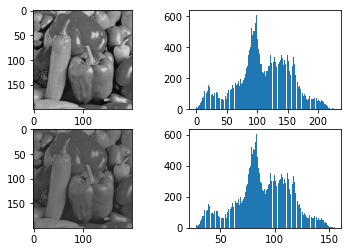

In [55]:
import matplotlib.pyplot as plt
import numpy as np

A = plt.imread("Imagenes5\\peppers.jpg").astype(float)

rmax = np.amax(A)
rmin = np.amin(A)

smin = rmin + 50
smax = rmax - 50

B = ((smax - smin) / (rmax - rmin)) * np.add(A-np.full(A.shape, rmin), smin)

fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(A, cmap='gray', vmin=0, vmax=255)
axs[0, 1].hist(A.ravel(), bins=256)
axs[1, 0].imshow(B, cmap='gray', vmin=0, vmax=255)
axs[1, 1].hist(B.ravel(), bins=256)

plt.show()

### Especificación del histograma <a class="anchor" id="histmatch"></a>

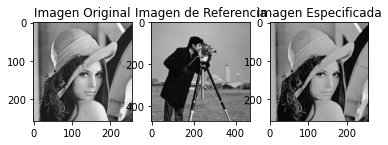

In [56]:
import matplotlib.pyplot as plt
import numpy as np

A = plt.imread('Leccion1\\lena.jpg')[:, :, 0]
B = plt.imread('Leccion1\\camarografo.jpg')

oldshape = A.shape
source = A.ravel()
template = B.ravel()

s_values, bin_idx, s_counts = np.unique(source, return_inverse=True,
                                        return_counts=True)
t_values, t_counts = np.unique(template, return_counts=True)

original_cumsum = np.cumsum(s_counts).astype(np.float64)
original_cumsum /= original_cumsum[-1]
ref_cumsum = np.cumsum(t_counts).astype(np.float64)
ref_cumsum /= ref_cumsum[-1]

interp_t_values = np.interp(original_cumsum, ref_cumsum, t_values)

final_image = interp_t_values[bin_idx].reshape(oldshape)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(A, cmap='gray')
ax1.set_title("Imagen Original")
ax2.imshow(B, cmap='gray')
ax2.set_title("Imagen de Referencia")
ax3.imshow(final_image, cmap='gray')
ax3.set_title('Imagen Especificada')
plt.show()

## Convolución<a class="anchor" id="conv"></a>

### Convolución 1D<a class="anchor" id="conv_1D"></a>

In [57]:
%Ejemplo convolución en 1D
clc; clear; close all;
pkg load image;

x = [-2 1 2]; m = length(x); 
y = [-4 3 4]; n = length(y);

z = zeros(m+n-1, 1);

for i=1:m+n-1
  for j = max([1 i+1-n]):min([i m])
      z(i) = z(i)+x(j)*y(i-j+1);
  endfor
endfor

display(z)

z =

    8
  -10
  -13
   10
    8



In [58]:
import numpy as np

x = [-2, 1, 2]
m = len(x)
y = [-4, 3, 4]
n = len(y)

z = np.zeros((m+n-1, 1))

for i in range(0, m+n-1):
    for j in range(max([0, i+1-n]), min([i, m-1])+1):
        z[i] = z[i] + x[j]*y[i-j]


print(z)

[[  8.]
 [-10.]
 [-13.]
 [ 10.]
 [  8.]]


### Convolución en 2D<a class="anchor" id="conv_2D"></a>

In [59]:
#Hacer la convolucion de 2 dimenciones sin funciones de octave
A = [1 0 1; 4 3 1; -1 0 -2]; 
B = [-1 1 2 3; -4 0 1 5]; #Matrices a convolucionar
[m1, n1] = size(A);
[m2, n2] = size(B);
C = zeros(m1+m2-1, n1+n2-1);
for j = 1:m1+m2-1
    for k = 1:n1+n2-1
        sum_C = 0;
        for p = max([1 j-m2+1]):min([j m1])
            for q = max([1 k-n2+1]):min([k n1])
                sum_C = sum_C + A(p,q)*B(j-p+1,k-q+1); #formula
            endfor
        endfor
        C(j,k) = sum_C;
    endfor
endfor
display(C)

C =

   -1    1    1    4    2    3
   -8    1    7   24   12    8
  -15  -13    0   18   12   -1
    4    0    7   -5   -2  -10



In [60]:
import numpy as np;
#Hacer la convolucion de 2 dimenciones sin funciones de python
A = np.matrix([[1,0,1],[4,3,1],[-1,0,-2]]);
B = np.matrix([[-1,1,2,3], [-4,0,1,5]]); #Matrices a convolucionar
[m1, n1] = A.shape;
[m2, n2] = B.shape;
C = np.zeros((m1+m2-1, n1+n2-1));
for j in range (1,m1+m2):
    for k in range (1,n1+n2):
        sum_C = 0;
        for p in range(max([1,j-m2+1]),min([j,m1])+1):
            for q in range(max([1,k-n2+1]),min([k,n1])+1):
                sum_C = sum_C + A[p-1,q-1]*B[j-p,k-q]; #formula -1 por que arrays de python comienzan en 0
        C[j-1,k-1] = sum_C;
print(C)

[[ -1.   1.   1.   4.   2.   3.]
 [ -8.   1.   7.  24.  12.   8.]
 [-15. -13.   0.  18.  12.  -1.]
 [  4.   0.   7.  -5.  -2. -10.]]


## Filtros en el dominio espacial <a class="anchor" id="space_domain"></a>

### Filtro Promedio <a class="anchor" id="promedio"></a>

In [61]:
pkg load image

A = imread('Imagenes6/baby_yoda.jpg');

subplot(1, 2, 1)
imshow(A)
title('Imagen Original')

% Máscara del filtro promedio
k = 3;
B =(1/k^2) * ones(k);
A = double(A);
C = conv2(A, B, 'same');
C = uint8(C);

subplot(1,2,2)
imshow(C)
title('Imagen Con Filtro Promedio')

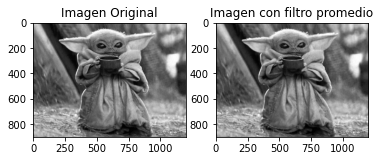

In [62]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

A = plt.imread('Imagenes6\\baby_yoda.jpg').astype(float)

k = 3
B = np.multiply((1/k**2), np.ones((k, k)))
C = convolve2d(A, B, "same").astype(np.uint8)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(A, cmap='gray')
ax1.set_title("Imagen Original")
ax2.imshow(C, cmap='gray')
ax2.set_title("Imagen con filtro promedio")

plt.show()

### Barbara con Filtro Promedio <a class="anchor" id="Lenapromedio"></a>

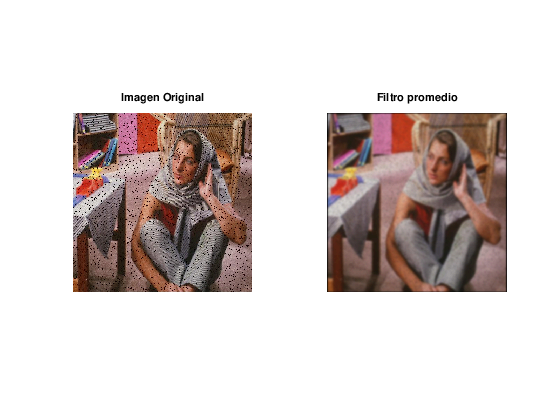

In [63]:
clc; clear; close all; %Limiar la linea de comandos
pkg load image; %Cargar el paquete de imagenes

function Y = filtroprom(A)
    %Esta función le aplica el filtro de la mediana a una imagen ya cargada "A"
    %
    %Sintaxis:  Y = mediana(A)
    % 
    %Parámetros Iniciales: 
    %             A = una imagen con ruido
    %    
    %Parámetros de Salida:                           
    %             Y = una imagen sin ruido            
    %
    %
  [m,n,i] = size(A);
  k=3;
  B=(1/k^2)*ones(k); %ones(k) crea un matriz de kxk de 1's
  A = double(A);
  if(i ==1)
        for i=1:10
        A(:,:,1) = conv2(A(:,:,1),B,'same');
        endfor
  else
        for i=1:10
        A(:,:,1) = conv2(A(:,:,1),B,'same');
        A(:,:,2) = conv2(A(:,:,2),B,'same');
        A(:,:,3) = conv2(A(:,:,3),B,'same');
        endfor
  endif
  Y = A;
  Y= uint8(Y);
 endfunction
 
A=imread('ImagenRuido/imagen1.jpg'); %cargar la imagen con ruido
subplot(1,2,1);
imshow(A);
title('Imagen Original');
Y=filtroprom(A); %Aplicarle el filtro de la mediana, el resutado queda en y

subplot(1,2,2);
imshow(Y); %Mostrar el resultado 'y', imagen sin ruido
title('Filtro promedio');

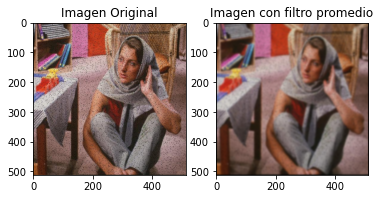

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

def filtroprom(A):
    n = A.shape[0];
    m = A.shape[1];
    i = (len(A.shape));
    A = A.astype(np.uint8);
    k = 3;
    B= np.ones((k,k)); #ones(k) crea un matriz de kxk de 1's
    B= B *(1/k**2) 
    if(i==2):
        for i in range(1,10):
            A[:,:] = signal.convolve2d(A[:,:],B,mode='same');
    else:
        for i in range(1,10):
            A[:,:,0] = signal.convolve2d(A[:,:,0],B,mode='same');
            A[:,:,1] = signal.convolve2d(A[:,:,1],B,mode='same');
            A[:,:,2] = signal.convolve2d(A[:,:,2],B,mode='same');
    Y = A;
    #Y = np.rint(A/255);
    return Y
 
A=plt.imread('ImagenRuido/imagen1.jpg'); #cargar la imagen con ruido
Y=filtroprom(A); #Aplicarle el filtro de la mediana, el resutado queda en y


fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(A)
ax1.set_title("Imagen Original")
ax2.imshow(Y)
ax2.set_title("Imagen con filtro promedio")
plt.show()

### Filtro Gaussiano <a class="anchor" id="gaussian"></a>

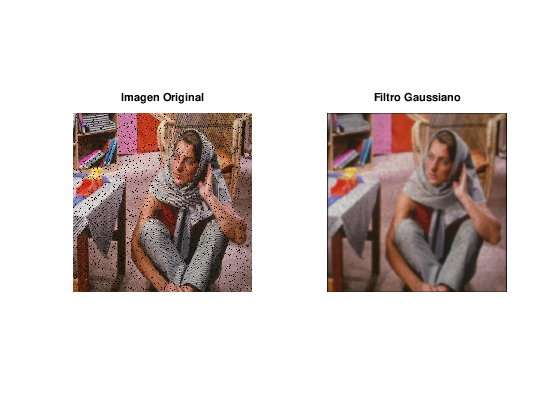

In [65]:
pkg load image; %Cargar el paquete de imagenes

function Y = gaussian_filter(A)
  [m,n,i] = size(A);
  k=256;
  B=(1/k)*[21 31 21;
           31 48 31;
           21 31 21]; %ones(k) crea un matriz de kxk de 1's
  A = double(A);
  for i=1:10
    A(:,:,1) = conv2(A(:,:,1),B,'same');
    A(:,:,2) = conv2(A(:,:,2),B,'same');
    A(:,:,3) = conv2(A(:,:,3),B,'same');
  endfor
  Y = A;
  Y= uint8(Y);
 endfunction
 
A=imread('ImagenRuido/imagen1.jpg'); %cargar la imagen con ruido
subplot(1,2,1);
imshow(A);
title('Imagen Original');
Y=gaussian_filter(A); %Aplicarle el filtro de la gaussiano, el resutado queda en y

subplot(1,2,2);
imshow(Y); %Mostrar el resultado 'y', imagen sin ruido
title('Filtro Gaussiano');

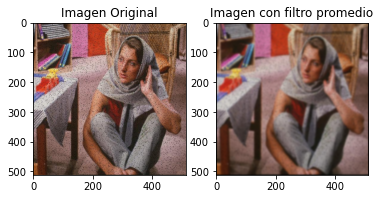

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

def filtroprom(A):
    n = A.shape[0];
    m = A.shape[1];
    i = (len(A.shape));
    A = A.astype(np.uint8);
    k = 3;
    B= np.ones((k,k)); #ones(k) crea un matriz de kxk de 1's
    B= B *(1/k**2) 
    if(i==2):
        for i in range(1,10):
            A[:,:] = signal.convolve2d(A[:,:],B,mode='same');
    else:
        for i in range(1,10):
            A[:,:,0] = signal.convolve2d(A[:,:,0],B,mode='same');
            A[:,:,1] = signal.convolve2d(A[:,:,1],B,mode='same');
            A[:,:,2] = signal.convolve2d(A[:,:,2],B,mode='same');
    Y = A;
    #Y = np.rint(A/255);
    return Y
 
A=plt.imread('ImagenRuido/imagen1.jpg'); #cargar la imagen con ruido
Y=filtroprom(A); #Aplicarle el filtro de la mediana, el resutado queda en y


fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(A)
ax1.set_title("Imagen Original")
ax2.imshow(Y)
ax2.set_title("Imagen con filtro promedio")
plt.show()

### Filtro Laplaciano <a class="anchor" id="laplace"></a>

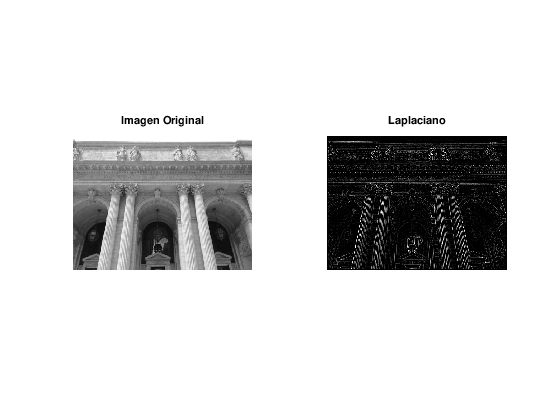

In [67]:
pkg load image

A = imread('Imagenes6/Columnas.jpg');

subplot(1, 2, 1)
imshow(A)
title('Imagen Original')

% laplaciano
%B = [1 0 1; 0 -4 0; 1 0 1];
B = [1 1 1; 1 -8 1; 1 1 1];

A = double(A);

% Convolución
C = conv2(A, B, 'same');

C = uint8(C);

subplot(1,2,2)
imshow(C)
title('Laplaciano')

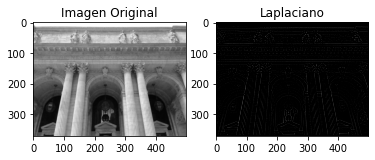

In [68]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

A = plt.imread('Imagenes6\\columnas.jpg')[:, :, 1].astype(float)

B = np.asarray([[1, 0, 1],
                [0, -4, 0],
                [1, 0, 1]])

C = convolve2d(A, B, "same")

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(A, cmap='gray')
ax1.set_title("Imagen Original")
ax2.imshow(C, cmap='gray', vmin=0, vmax=255)
ax2.set_title("Laplaciano")

plt.show()


### Resaltado de bordes con filtro laplaciano <a class="anchor" id="borders_laplace"></a>

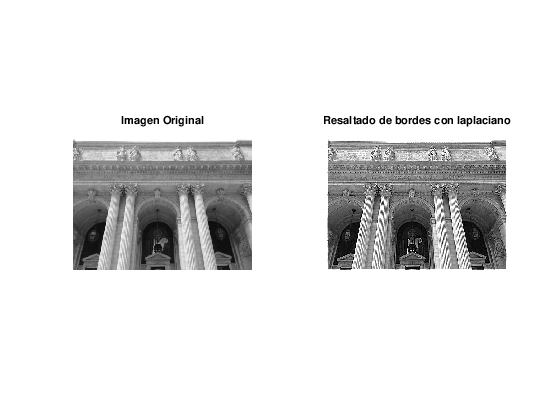

In [69]:
pkg load image

A = imread('Imagenes6/Columnas.jpg');

subplot(1, 2, 1)
imshow(A)
title('Imagen Original')

% laplaciano
B = [1 1 1; 1 -8 1; 1 1 1];

A = double(A);

% Convolución
C = conv2(A, B, 'same'); % detectar los bordes
alpha = -0.5;
D = A + alpha*C; % enfatizar los bordes de la imagen A
D = uint8(D);

subplot(1,2,2)
imshow(D)
title('Resaltado de bordes con laplaciano')

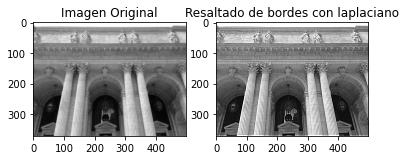

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

A = plt.imread('Imagenes6\\columnas.jpg')[:, :, 1].astype(float)

B = np.asarray([[1, 1, 1],
                [1, -8, 1],
                [1, 1, 1]])

C = convolve2d(A, B, "same")

alpha = -0.5

D = A + np.multiply(alpha, C)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(A, cmap='gray')
ax1.set_title("Imagen Original")
ax2.imshow(D, cmap='gray', vmin=0, vmax=255)
ax2.set_title("Resaltado de bordes con laplaciano")

plt.show()

### Filtro Diferencia Direccional <a class="anchor" id="diff_dir"></a>

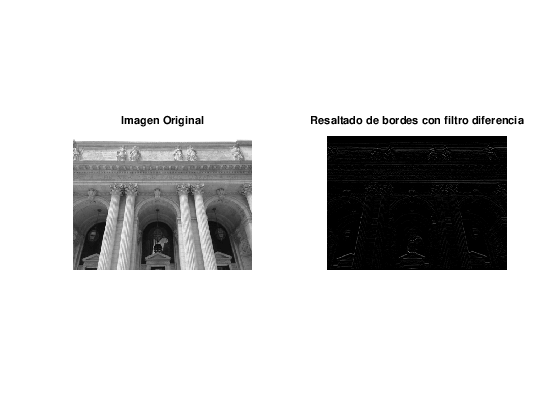

In [71]:
pkg load image

A = imread('Imagenes6/Columnas.jpg');

subplot(1, 2, 1)
imshow(A)
title('Imagen Original')

% laplaciano
B = [0 1 0; 0 0 0; 0 -1 0]; % Vertical
%B = [0 0 0; 1 0 -1; 0 0 0]; % horizontal

A = double(A);

% Convolución
C = conv2(A, B, 'same'); % detectar los bordes
C = uint8(C);

subplot(1,2,2)
imshow(C)
title('Resaltado de bordes con filtro diferencia')

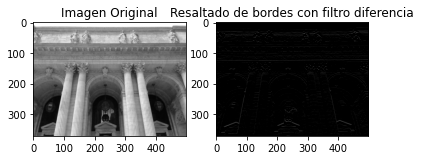

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

A = plt.imread('Imagenes6\\columnas.jpg')[:, :, 1].astype(float)

B = np.asarray([[0, 1, 0],
                [0, 0, 0],
                [0, -1, 0]])

C = convolve2d(A, B, "same")

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(A, cmap='gray')
ax1.set_title("Imagen Original")
ax2.imshow(C, cmap='gray', vmin=0, vmax=255)
ax2.set_title("Resaltado de bordes con filtro diferencia")

plt.show()

### Operador de sobel <a class="anchor" id="sobel"></a>

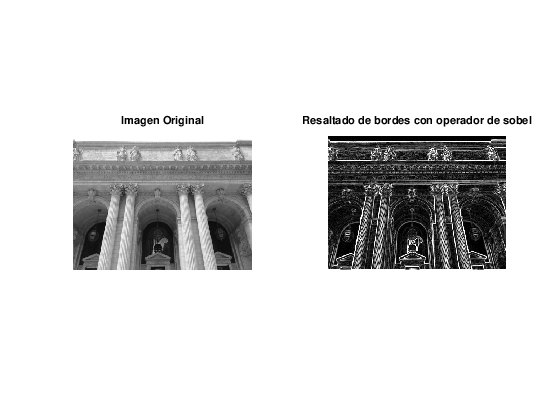

In [73]:
pkg load image

A = imread('Imagenes6/Columnas.jpg');

subplot(1, 2, 1)
imshow(A)
title('Imagen Original')

% laplaciano
Bx = [-1 -2 -1; 0 0 0; 1 2 1]; 
By = [-1 0 1; -2 0 2; -1 0 1]; 

A = double(A);

% Convolución
Ax = conv2(A, Bx, 'same');
Ay = conv2(A, By, 'same');

C = sqrt(Ax.^2 + Ay.^2);
C = uint8(C);

subplot(1,2,2)
imshow(C)
title('Resaltado de bordes con operador de sobel')

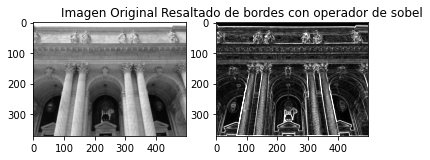

In [74]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

A = plt.imread('Imagenes6\\columnas.jpg')[:, :, 1].astype(float)

Bx = np.asarray([[-1, -2, -1],
                [0, 0, 0],
                [1, 2, 1]])

By = np.asarray([[-1, 0, 1],
                [-2, 0, 2],
                [-1, 0, 1]])

Ax = convolve2d(A, Bx, "same")
Ay = convolve2d(A, By, "same")

C = np.sqrt(Ax**2 + Ay**2)


fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(A, cmap='gray')
ax1.set_title("Imagen Original")
ax2.imshow(C, cmap='gray', vmin=0, vmax=255)
ax2.set_title("Resaltado de bordes con operador de sobel")
plt.show()

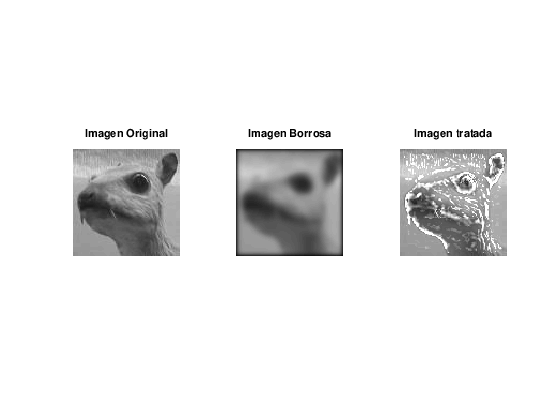

In [75]:
pkg load image

A = imread('Imagenes6/animal.jpg');
subplot(1, 3, 1)
imshow(A)
title('Imagen Original')
#Filtro Promedio
A_p = filtroprom(A);
subplot(1, 3, 2)
imshow(A_p)
title('Imagen Borrosa')
#Enfatizar bordes
C=A_p-A;
alpha= 10;
D=A+alpha.*C;
subplot(1, 3, 3)
imshow(D)
title('Imagen tratada')

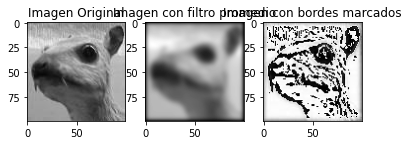

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

A=plt.imread('Imagenes6/animal.jpg'); #Lectura de la imagen

A_p=filtroprom(A); #Aplicarle el filtro de la mediana

C=A_p-A;
alpha= 10;
D=A+alpha*C;

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(A, cmap='gray')
ax1.set_title("Imagen Original")
ax2.imshow(A_p, cmap='gray')
ax2.set_title("Imagen con filtro promedio")
ax3.imshow(C, cmap='gray')
ax3.set_title("Imagen con bordes marcados")
plt.show()

## Filtros en el dominio de la frecuencia <a class="anchor" id="freq"></a>

### Transformada Rápida de Fourier <a class="anchor" id="fft"></a>

t1 =  15.196
t2 =  0.29640


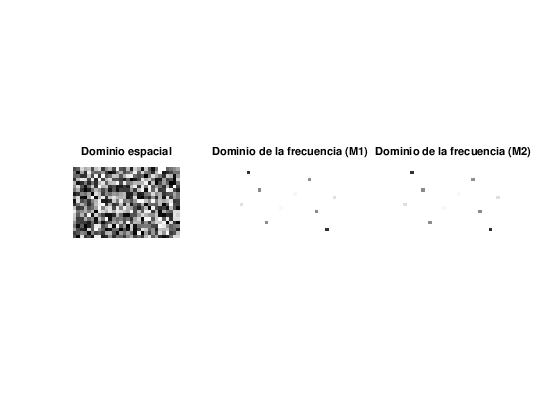

In [77]:
m = 20;
n = 30;
A = rand(m, n); % matriz de entradas aleatorios mxn

subplot(1, 3, 1)
imshow(A)
title('Dominio espacial')

% Implementación de la transformada DFT-2D, usando la fórmula original
tic

F = zeros(m, n);

for u = 1:m % recorre filas
    for v = 1:n % recorre columnas
        % calculo de la doble suma
        for x = 0:m-1
            for y = 0:n-1
                F(u, v) = F(u, v) + A(x+1, y+1) * exp(-1i*2*pi*(u*x/m + v*y/n));
            end
        end
    end
end

t1 = toc

subplot(1, 3, 2)
imshow(abs(F))
title('Dominio de la frecuencia (M1)')

% Implementación de la transformada DFT-2D, usando el comando de octave.
tic
Aux = fft2(A);
F1 = [];
% 1. para que el resultado sea 100% igual a la formula general, hay que reordenar las filas de la última a la primera
% 2. calcular el conjugado de cada fila
% 3. Hacer un flip para cada fila

for j=1:m
    F1(j, :) = flip(Aux(m-j+1, :)');
end
t2 = toc

subplot(1, 3, 3)
imshow(abs(F1))
title('Dominio de la frecuencia (M2)')

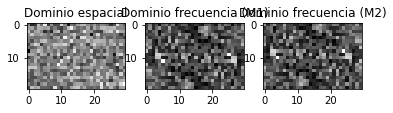

In [78]:
import matplotlib.pyplot as plt
import numpy as np

m = 20
n = 30
A = np.random.normal(0, 1, (m, n))

F = np.zeros((m, n), dtype='complex_')

for u in range(m):
    for v in range(n):
        for x in range(m):
            for y in range(n):
                F[u, v] = F[u, v] + A[x, y] * np.exp(-1j*2*np.pi*(u*x/m + v*y/n))


Aux = np.fft.fft2(A)

F1 = np.zeros(A.shape, dtype='complex_')

for j in range(m):
    F1[j, :] = np.flip(Aux[m-j-1, :].T)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(A, cmap='gray')
ax1.set_title("Dominio espacial")
ax2.imshow(abs(F), cmap='gray')
ax2.set_title("Dominio frecuencia (M1)")
ax3.imshow(abs(F1), cmap='gray')
ax3.set_title("Dominio frecuencia (M2)")

plt.show()


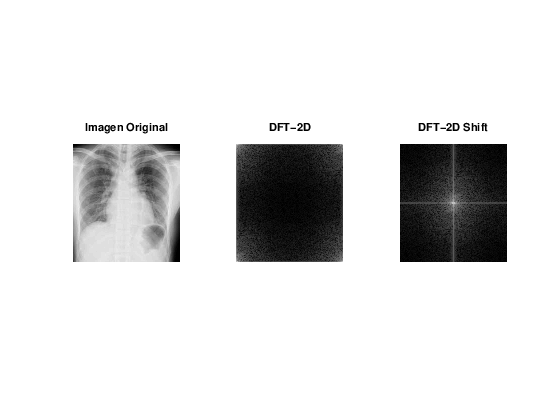

In [79]:
A = imread('Imagenes7/chest.jpg');

subplot(1,3,1)
imshow(A)
title('Imagen Original')

A = im2double(A);
F = fft2(A);
subplot(1,3,2)
imshow(log(1 + abs(F)), [])
title('DFT-2D')


F_shitf = fftshift(F);
subplot(1,3,3)
imshow(log(1 + abs(F_shitf)), [])
title('DFT-2D Shift')

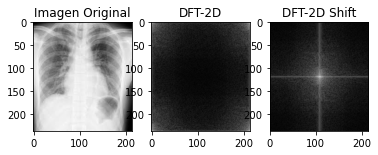

In [80]:
import matplotlib.pyplot as plt
import numpy as np


A = plt.imread("Imagenes7\\chest.jpg")[:, :, 0] / 255
F = np.fft.fft2(A)
F_shift = np.fft.fftshift(F)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(A, cmap='gray')
ax1.set_title("Imagen Original")
ax2.imshow(np.log(1+abs(F)), cmap='gray')
ax2.set_title("DFT-2D")
ax3.imshow(np.log(1+abs(F_shift)), cmap='gray')
ax3.set_title("DFT-2D Shift")

plt.show()


### Pasa bajas <a class="anchor" id="fft"></a>

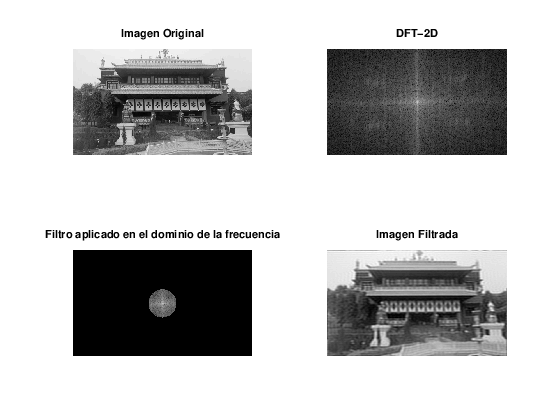

In [81]:
pkg load image

A = imread('Imagenes7/edificio_china.jpg');

subplot(2, 2, 1)
imshow(A)
title('Imagen Original')

A = im2double(A);
F = fftshift(fft2(A));
subplot(2,2,2)
imshow(log(1 + abs(F)), [])
title('DFT-2D')

% calcular la matriz de distancias
[m, n] = size(A);
D = zeros(m, n);
D(ceil(m/2), ceil(n/2)) = 1;

% calcular filtro ideal
D0 = 50; 
F_B = bwdist(D) <= D0;

% TODO: tarea completar el filtro ideal, completar el círculo

% aplicar el filtro
H = F.*F_B;

subplot(2,2,3)
imshow(log(1 + abs(H)), [])
title('Filtro aplicado en el dominio de la frecuencia')

% devolverse al dominio espacial
H = fftshift(H);
A_r = ifft2(H);

subplot(2,2,4)
imshow(real(A_r))
title('Imagen Filtrada')

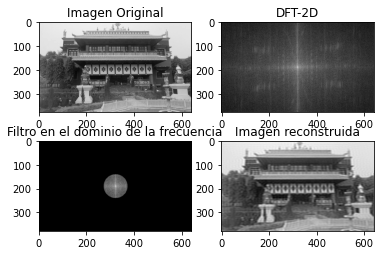

In [82]:
import matplotlib.pyplot as plt
from numpy.fft import fftshift, fft2, ifft2
import numpy as np
from scipy.ndimage.morphology import distance_transform_edt


A = plt.imread("Imagenes7\\edificio_china.jpg")[:, :, 1] / 255

F = fftshift(fft2(A))

m, n = A.shape

D = np.zeros((m, n))
D[int(np.ceil(m/2)), int(np.ceil(n/2))] = 1

D0 = 50
F_B = distance_transform_edt(1-D) <= D0

H = np.multiply(F, F_B)

H1 = fftshift(H)
A_r = ifft2(H1)

fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(A, cmap='gray', vmin=0, vmax=1)
axs[0, 0].set_title("Imagen Original")

axs[0, 1].imshow(np.log(1 + abs(F)), cmap='gray')
axs[0, 1].set_title("DFT-2D")

axs[1, 0].imshow(np.log(1 + abs(H)), cmap='gray')
axs[1, 0].set_title("Filtro en el dominio de la frecuencia")

axs[1, 1].imshow(np.real(A_r), cmap='gray')
axs[1, 1].set_title("Imagen reconstruida")


plt.show()

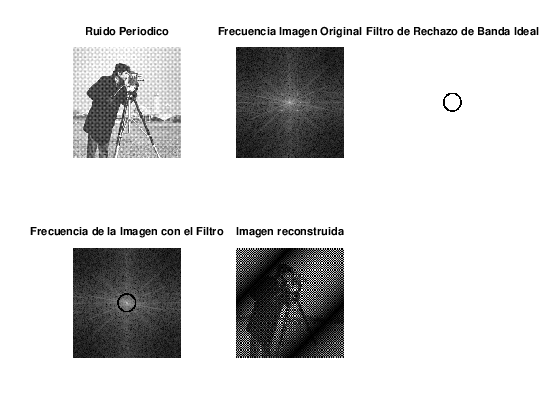

In [2]:
%Codigo Octave

clc; clear; 

pkg load image

A = imread('Imagenes8/imagen_rp.jpg');
subplot(2, 3, 1);
imshow(A);
title('Ruido Periodico');

A_d = im2double(A);
F1 = fft2(A_d);
D1 = fftshift(F1);

subplot(2, 3, 2);
imshow(log(1 + abs(D1)), []);
title('Frecuencia Imagen Original');

% Filtro de Rechazo de Banda Ideal
% Matrix de Distancias
[m, n] = size(A);
dist = zeros(m, n);

for i = 1 : m
  for j = 1 : n
    dist(i, j) = sqrt((i - m / 2) ^ 2 + (j - n / 2) ^ 2);
  endfor
endfor

W = 5;
D0 = 25;
H = ones(m, n);

ind = and((D0 - (W / 2)) <= dist, dist <= (D0 + (W / 2)));
H(ind) = 0;

subplot(2, 3, 3);
imshow(H);
title('Filtro de Rechazo de Banda Ideal');

F1 = fftshift(F1);
Ff = H .* F1;
D2 = Ff;

subplot(2, 3, 4);
imshow(log(1 + abs(D2)), []);
title('Frecuencia de la Imagen con el Filtro');

I_rec = ifft2(Ff);
subplot(2, 3, 5);
I_most = im2uint8(real(I_rec));
imshow(I_most);
title('Imagen reconstruida')

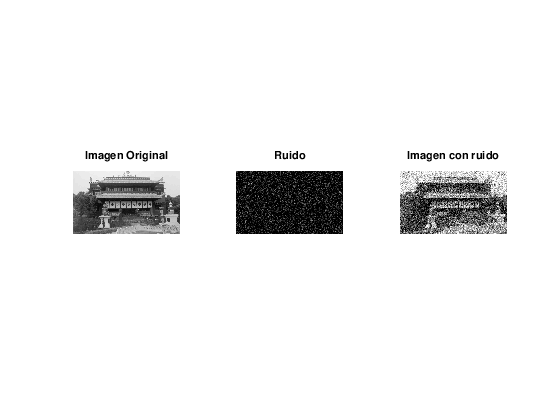

In [84]:
pkg load image

A = imread('Imagenes7/edificio_china.jpg');

subplot(1, 3, 1)
imshow(A)
title('Imagen Original')

% crear un ruido aditivo
[m n] = size(A);

alpha = 0.2;

N = alpha * randn(m, n); % matriz aleatoria con dist normal.

subplot(1, 3, 2)
imshow(N)
title('Ruido')

% crear la imagen con ruido
A = im2double(A); % normalizado
B = A + N;

B = im2uint8(B);

subplot(1, 3, 3)
imshow(B)
title('Imagen con ruido')

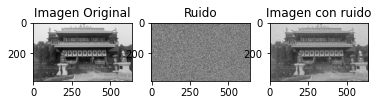

In [85]:
import matplotlib.pyplot as plt
import numpy as np


A = plt.imread("Imagenes7\\edificio_china.jpg")[:, :, 1]

m, n = A.shape

alpha = 0.4

N = np.multiply(alpha, np.random.rand(m, n))

A_n = A / 255
B = A_n + N

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(A, cmap='gray')
ax1.set_title("Imagen Original")

ax2.imshow(N, cmap='gray')
ax2.set_title("Ruido")

ax3.imshow(B, cmap='gray')
ax3.set_title("Imagen con ruido")

plt.show()

### Filtro Promedio <a class="anchor" id="promedio"></a>

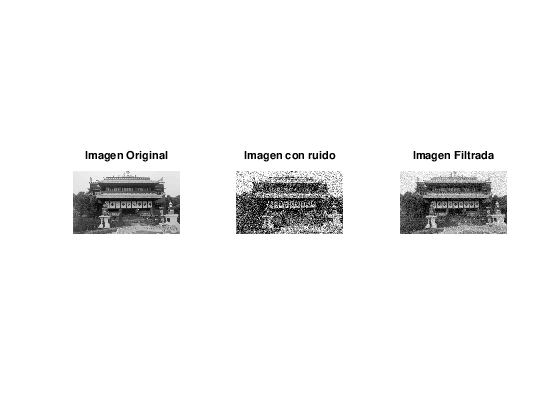

In [86]:
pkg load image

A = imread('Imagenes7/edificio_china.jpg');

subplot(1, 3, 1)
imshow(A)
title('Imagen Original')

% crear un ruido aditivo
[m n] = size(A);

alpha = 0.2;

N = alpha * randn(m, n); % matriz aleatoria con dist normal.

% crear la imagen con ruido
A = im2double(A); % normalizado
B = A + N;

B1 = im2uint8(B);

subplot(1, 3, 2)
imshow(B1)
title('Imagen con ruido')

% filtro del promedio
A_t = zeros(m, n);

for x=2:m-1 % no se tocan los bordes
    for y=2:n-1
    % centro es B(x, y)
        WF1 = B(x-1, y-1) + B(x-1, y) + B(x-1, y+1);
        WF2 = B(x, y-1) + B(x, y) + B(x, y+1);
        WF3 = B(x+1, y-1) + B(x+1, y) + B(x+1, y+1);
        
        A_t(x, y) = (1/9) * (WF1 + WF2 + WF3); % 1/9 porque la ventana es de 3x3
    end
end

#Bordes
#Superior izquierdo
WF1 = B(1,1) + B(1,2);
WF2 = B(2,1) + B(2,2);
A_t(1, 1) = (1/9) * (WF1 + WF2); % 1/9 porque la ventana es de 3x3
#Superior derecho
WF1 = B(m-1,1) + B(m,2);
WF2 = B(m-1,1) + B(m,2) ;
A_t(m, 1) = (1/9) * (WF1 + WF2); % 1/9 porque la ventana es de 3x3
#Inferior izquierdo
WF1 = B(1, n-1) + B(1, n);
WF2 = B(2, n-1) + B(2, n);
A_t(1, n) = (1/9) * (WF1 + WF2); % 1/9 porque la ventana es de 3x3
#Inferior derecho
WF1 = B(m-1, n-1) + B(m-1, n);
WF2 = B(m, n-1) + B(m, n);
A_t(m, n) = (1/9) * (WF1 + WF2); % 1/9 porque la ventana es de 3x3

A_t = im2uint8(A_t);

subplot(1, 3, 3)
imshow(A_t)
title('Imagen Filtrada')

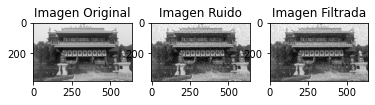

In [87]:
import matplotlib.pyplot as plt
import numpy as np


A = plt.imread("Imagenes7\\edificio_china.jpg")[:, :, 0] / 255

alpha = 0.2
N = alpha * np.random.normal(0, 1, A.shape)
B = np.add(A, N)

A_t = np.zeros(A.shape, dtype='complex_')

m, n = A.shape

for x in range(1, m-1):
    for y in range(1, n-1):
        WF1 = B[x-1, y-1] + B[x-1, y] + B[x-1, y+1]
        WF2 = B[x, y-1] + B[x, y] + B[x, y+1]
        WF3 = B[x+1, y-1] + B[x+1, y] + B[x+1, y+1]

        A_t[x, y] = (WF1 + WF2 + WF3) * 1/9
        
#Bordes
#Superior izquierdo
WF1 = B[0,0] + B[0,1];
WF2 = B[1,0] + B[1,1];
A_t[0, 0] = (1/9) * (WF1 + WF2); 
#Superior derecho
WF1 = B[m-2,0] + B[m-1,1];
WF2 = B[m-2,0] + B[m-1,1] ;
A_t[m-1, 0] = (1/9) * (WF1 + WF2); 
#Inferior izquierdo
WF1 = B[0, n-2] + B[0, n-1];
WF2 = B[1, n-2] + B[1, n-1];
A_t[0, n-1] = (1/9) * (WF1 + WF2); 
#Inferior derecho
WF1 = B[m-2, n-2] + B[m-2, n-1];
WF2 = B[m-1, n-2] + B[m-1, n-1];
A_t[m-1, n-1] = (1/9) * (WF1 + WF2);

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(A, cmap='gray')
ax1.set_title("Imagen Original")
ax2.imshow(B, cmap='gray', vmax=1, vmin=0)
ax2.set_title("Imagen Ruido")
ax3.imshow(abs(A_t), cmap='gray', vmax=1, vmin=0)
ax3.set_title("Imagen Filtrada")

plt.show()

### Filtro Promedio Geométrico <a class="anchor" id="prom_geom"></a>

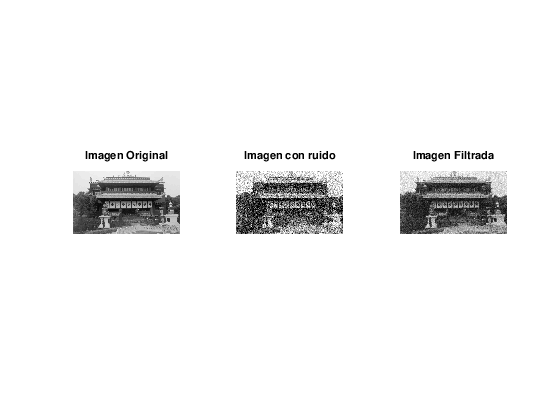

In [88]:
pkg load image

A = imread('Imagenes7/edificio_china.jpg');

subplot(1, 3, 1)
imshow(A)
title('Imagen Original')

% crear un ruido aditivo
[m n] = size(A);

alpha = 0.2;

N = alpha * randn(m, n); % matriz aleatoria con dist normal.

% crear la imagen con ruido
A = im2double(A); % normalizado
B = A + N;

B1 = im2uint8(B);

subplot(1, 3, 2)
imshow(B1)
title('Imagen con ruido')

% filtro del promedio geometrico
A_t = zeros(m, n);

for x=2:m-1 % no se tocan los border
    for y=2:n-1
    % centro es B(x, y)
        WF1 = B(x-1, y-1) * B(x-1, y) * B(x-1, y+1);
        WF2 = B(x, y-1) * B(x, y) * B(x, y+1);
        WF3 = B(x+1, y-1) * B(x+1, y) * B(x+1, y+1);
        
        A_t(x, y) = (WF1 * WF2 * WF3)^(1/9); % 1/9 porque la ventana es de 3x3
    end
end

A_t = im2uint8(real(A_t));

subplot(1, 3, 3)
imshow(A_t)
title('Imagen Filtrada')

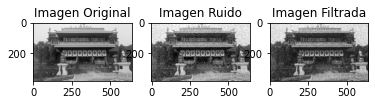

In [89]:
import matplotlib.pyplot as plt
import numpy as np


A = plt.imread("Imagenes7\\edificio_china.jpg")[:, :, 0] / 255

alpha = 0.2
N = alpha * np.random.normal(0, 1, A.shape)
B = np.add(A, N)

A_t = np.zeros(A.shape, dtype='complex_')

m, n = A.shape

for x in range(1, m-1):
    for y in range(1, n-1):
        WF1 = B[x-1, y-1] * B[x-1, y] * B[x-1, y+1]
        WF2 = B[x, y-1] * B[x, y] * B[x, y+1]
        WF3 = B[x+1, y-1] * B[x+1, y] * B[x+1, y+1]

        A_t[x, y] = np.power(WF1 * WF2 * WF3, 1/9, dtype=complex)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(A, cmap='gray')
ax1.set_title("Imagen Original")
ax2.imshow(B, cmap='gray', vmax=1, vmin=0)
ax2.set_title("Imagen Ruido")
ax3.imshow(abs(A_t), cmap='gray', vmax=1, vmin=0)
ax3.set_title("Imagen Filtrada")

plt.show()

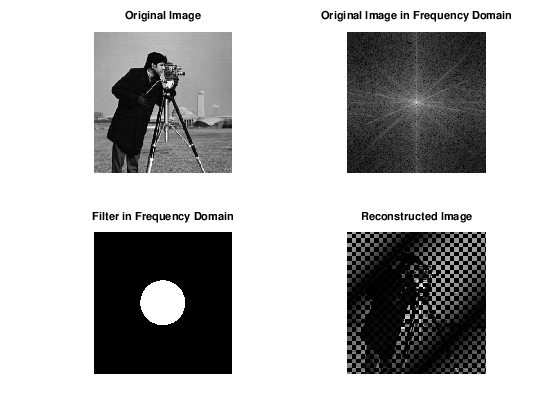

In [4]:
clc; clear; close all;
pkg load image;

A = imread('Imagenes8/camarografo.jpg');
subplot(2, 2, 1);
imshow(A);
title('Original Image');

A_d = im2double(A);
F1 = fft2(A_d);
G = fftshift(F1);
subplot(2, 2, 2);
imshow(log(1 + abs(G)), []);
title('Original Image in Frequency Domain');


[m, n] = size(G); 
dist = zeros(m, n);

for i = 1:m
  for j = 1:n
    dist(i, j) = sqrt((i - m / 2) ^ 2 + (j - n / 2) ^ 2);
  endfor
endfor

H = zeros(size(G));
D0 = 50;
ind = (dist <= D0);
H(ind) = 1; 


subplot(2, 2, 3);
imshow(log(1 + abs(H)), []);
title("Filter in Frequency Domain");

F = zeros(size(G), "uint8");
tol = 100;

for i = 1:m
    for j = 1:n
        if H(i, j) >= tol
            F(i, j) = G(i, j) / H(i, j);
        else
            F(i, j) = G(i, j);
        endif
    endfor
endfor

X = real(ifft2(F));

subplot(2, 2, 4);
imshow(X);
title("Reconstructed Image");

## Reducción de ruido en el dominio de la frecuencia <a class="anchor" id="noise_red_freq"></a>

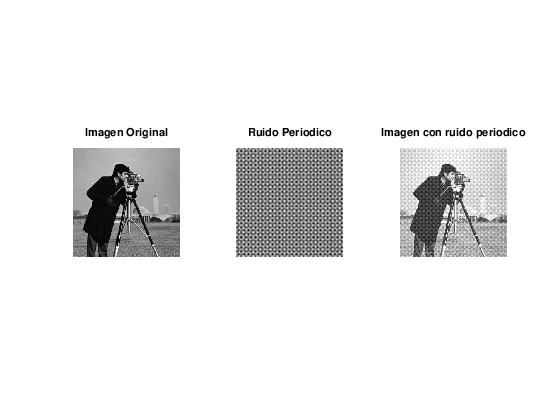

In [91]:
pkg load image

A = imread('Imagenes8/camarografo.jpg');

subplot(1, 3, 1)
imshow(A)
title('Imagen Original')

N = imread('Imagenes8/ruido_periodico.jpg');

subplot(1, 3, 2)
imshow(N)
title('Ruido Periodico')

A = im2double(A);
N = im2double(N);

C = A + 0.4*N;

C = im2uint8(C);

subplot(1, 3, 3)
imshow(C)
title('Imagen con ruido periodico')

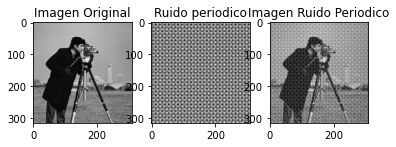

In [92]:
import matplotlib.pyplot as plt
import numpy as np


A = plt.imread("Imagenes8\\camarografo.jpg") / 255
N = plt.imread("Imagenes8\\ruido_periodico.jpg")[:, :, 0] / 255

C = A + 0.4*N

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(A, cmap='gray')
ax1.set_title("Imagen Original")
ax2.imshow(N, cmap='gray')
ax2.set_title("Ruido periodico")
ax3.imshow(C, cmap='gray')
ax3.set_title("Imagen Ruido Periodico")

plt.show()

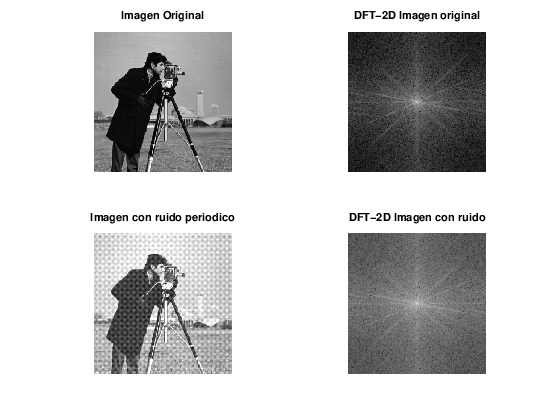

In [93]:
% FFT 2D
pkg load image

A = imread('Imagenes8/camarografo.jpg');

subplot(2, 2, 1)
imshow(A)
title('Imagen Original')

A = im2double(A);
F1 = fft2(A);
F1 = fftshift(F1);

subplot(2, 2, 2)
imshow(log(1+abs(F1)), [])
title('DFT-2D Imagen original')

N = imread('Imagenes8/ruido_periodico.jpg');
N = im2double(N);
C = A + 0.4*N;
C = im2uint8(C);

subplot(2, 2, 3)
imshow(C)
title('Imagen con ruido periodico')


F2 = fft2(C);
F2 = fftshift(F2);

subplot(2, 2, 4)
imshow(log(1+abs(F2)), [])
title('DFT-2D Imagen con ruido')


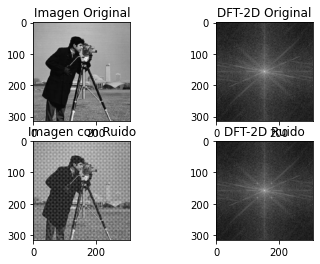

In [94]:
import matplotlib.pyplot as plt
import numpy as np


A = plt.imread("Imagenes8\\camarografo.jpg") / 255
F1 = np.fft.fft2(A)
F1 = np.fft.fftshift(F1)

N = plt.imread("Imagenes8\\ruido_periodico.jpg")[:, :, 0] / 255
C = A + 0.4*N

F2 = np.fft.fft2(C)
F2 = np.fft.fftshift(F2)

fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(A, cmap='gray')
axs[0, 0].set_title("Imagen Original")
axs[0, 1].imshow(np.log(1+abs(F1)), cmap='gray')
axs[0, 1].set_title("DFT-2D Original")

axs[1, 0].imshow(C, cmap='gray')
axs[1, 0].set_title("Imagen con Ruido")
axs[1, 1].imshow(np.log(1+abs(F2)), cmap='gray')
axs[1, 1].set_title("DFT-2D Ruido")


plt.show()

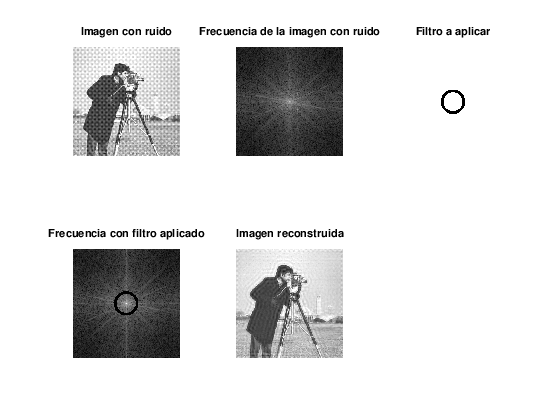

In [95]:
pkg load image;

A = imread('Imagenes8\\imagen_rp.jpg');
subplot(2,3,1);
imshow(A);
title('Imagen con ruido')

A_d=im2double(A);
F2=fft2(A_d);
D2=fftshift(F2);
subplot(2,3,2);
imshow(log(1+abs(D2)),[]);
title('Frecuencia de la imagen con ruido')
#Filtro Rechaza Banda
[m,n]=size(A);
#Para crear circulo
circ=zeros(m,n);
for i=1:m
    for j=1:n
        circ(i,j)=sqrt(i^2+j^2);
    endfor
endfor
#Crear circulos
W=8;
D=32;
H=ones(m,n);
Z=and(D-W/2<=circ,circ<=D+W/2);
H(Z)=0;
T=rot90(H(1:floor(m/2),1:floor(n/2)));

[mt,nt]=size(T);
H(floor(m/2)+5:m,1:nt)=T;
H=(H).*rot90(rot90(H));

D2=fftshift(H);
subplot(2,3,3);
imshow(D2);
title('Filtro a aplicar')
#Filtro
newF=(H).*F2;
D3=fftshift(newF);

subplot(2,3,4);
imshow(log(1+abs(D3)),[]);
title('Frecuencia con filtro aplicado')

Rec=ifft2(newF);
subplot(2,3,5);
im2uint8(real(Rec));
NewIm=im2uint8(real(Rec));
imshow(NewIm)
title('Imagen reconstruida')

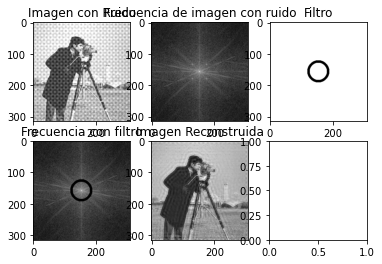

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

A = plt.imread("Imagenes8\\imagen_rp.jpg") / 255
#Frecuencia del ruido
F2=np.fft.fft2(A);
D2=np.fft.fftshift(F2);
D2=np.log(1+abs(D2))
#Filtro rechazabanda
m,n=A.shape
circ=np.zeros((m,n));
for i in range(m):
    for j in range(n):
        circ[i,j]=np.sqrt((i+1)**2+(j+1)**2)
W=8
D=32
H=np.ones((m,n))
for i in range(m):
    for j in range(n):
        if((D-W/2<=circ[i,j]) and (circ[i,j]<=D+W/2)):
            H[i,j]=0;
T=np.rot90(H[0:int(m/2)-3,0:int(n/2)+4])
H[int(m/2):m+1,0:int(n/2)]=T
H=np.multiply(H,np.rot90(H,2));
fig,axs=plt.subplots(2,3);
#Aplicar filtro
D3=np.fft.fftshift(H)
newF=np.multiply(H,F2)
D4=np.fft.fftshift(newF)
D4=np.log(1+abs(D4))
Rec=np.fft.ifft2(newF)
Rec=np.real(Rec)

axs[0,0].imshow(A,cmap='gray');
axs[0,0].set_title('Imagen con Ruido');
axs[0,1].imshow(D2,cmap='gray');
axs[0,1].set_title('Frecuencia de imagen con ruido');
axs[0,2].imshow(D3,cmap='gray');
axs[0,2].set_title('Filtro');
axs[1,0].imshow(D4,cmap='gray');
axs[1,0].set_title('Frecuencia con filtro');
axs[1,1].imshow(Rec,cmap='gray');
axs[1,1].set_title('Imagen Reconstruida');

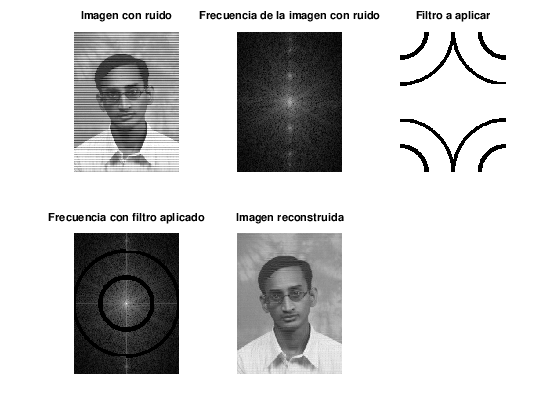

In [97]:
pkg load image;
A = imread('Imagenes8\\periodico_ruido.png');
subplot(2,3,1);
imshow(A);
title('Imagen con ruido')

function Z = circulo(W,D,circ)
    Z=and(D-W/2<=circ,circ<=D+W/2);
endfunction

A_d=im2double(A);
F2=fft2(A_d);
D2=fftshift(F2);
subplot(2,3,2);
imshow(log(1+abs(D2)),[]);
title('Frecuencia de la imagen con ruido')

#Filtro Rechaza Banda
[m,n]=size(A);
#Para crear circulo
circ=zeros(m,n);
for i=1:m
    for j=1:n
        circ(i,j)=sqrt(i^2+j^2);
    endfor
endfor
#Crear circulos

H=ones(m,n);
Z1=circulo(10,60,circ);
H(Z1)=0;
Z2=circulo(8,120,circ);
H(Z2)=0;

T=rot90(H(1:m/2,1:n/2));
[mt,nt]=size(T);
H(m+1-mt:m,1:nt)=T;
H=(H).*rot90(rot90(H));

D2=fftshift(H);
subplot(2,3,3);
imshow(H);
title('Filtro a aplicar')

#Filtro
newF=(H).*F2;
D3=fftshift(newF);

subplot(2,3,4);
imshow(log(1+abs(D3)),[]);
title('Frecuencia con filtro aplicado')

Rec=ifft2(newF);
subplot(2,3,5);
im2uint8(real(Rec));
NewIm=im2uint8(real(Rec));
imshow(NewIm)
title('Imagen reconstruida')

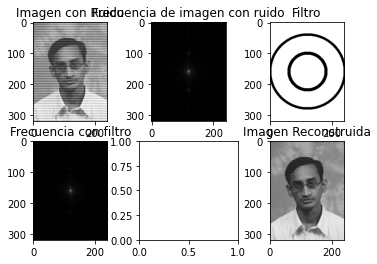

In [98]:
import matplotlib.pyplot as plt
import numpy as np
import cv2


def Z(W,D,circ,H):
    for i in range(m):
        for j in range(n):
            if((D-W/2<=circ[i,j]) and (circ[i,j]<=D+W/2)):
                H[i,j]=0;
    return H;

A = plt.imread("Imagenes8\\periodico_ruido.png") / 255
#Frecuencia del ruido
F2=np.fft.fft2(A);
D2=np.fft.fftshift(F2);
D2=np.log(1+abs(D2))
#Filtro rechazabanda
m,n=A.shape
circ=np.zeros((m,n));
for i in range(m):
    for j in range(n):
        circ[i,j]=np.sqrt((i+1)**2+(j+1)**2)
H=np.ones((m,n))
H=Z(10,60,circ,H);
H=Z(8,120,circ,H);
T=np.rot90(H[0:int(m/2)-40,0:int(n/2)+40])
H[int(m/2):m+1,0:int(n/2)]=T
H=np.multiply(H,np.rot90(H,2));
fig,axs=plt.subplots(2,3);
#Aplicar filtro
D3=np.fft.fftshift(H)
newF=np.multiply(H,F2)
D4=np.fft.fftshift(newF)
D4=np.log(1+abs(D4))
Rec=np.fft.ifft2(newF)
Rec=np.real(Rec)

axs[0,0].imshow(A,cmap='gray');
axs[0,0].set_title('Imagen con Ruido');
axs[0,1].imshow(D2,cmap='gray');
axs[0,1].set_title('Frecuencia de imagen con ruido');
axs[0,2].imshow(D3,cmap='gray');
axs[0,2].set_title('Filtro');
axs[1,0].imshow(D4,cmap='gray');
axs[1,0].set_title('Frecuencia con filtro');
axs[1,2].imshow(Rec,cmap='gray');
axs[1,2].set_title('Imagen Reconstruida');

## Procesamiento de Imágenes Morfológicas <a class="anchor" id="morfo"></a>

In [99]:
function Y = binaria(X)
    Y = zeros(size(X));
    ind_blanco = (X >= 0.5);
    ind_negro = (X < 0.5);
    Y(ind_blanco) = 1;
endfunction

In [100]:
def binaria(X):
    Y = np.zeros(X.shape)
    whites = X > 0.5
    Y[whites] = 1
    return Y

### Operaciones Morfológicas <a class="anchor" id="op_morfo"></a>

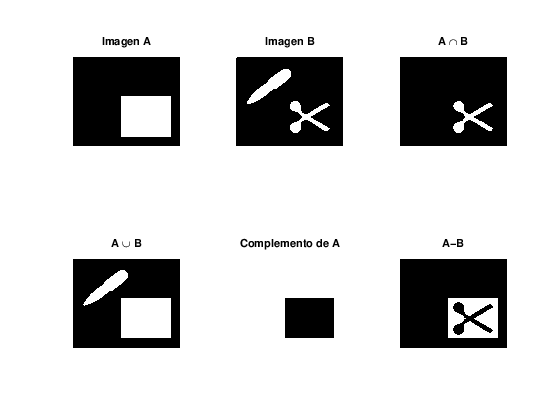

In [101]:
% operaciones morfologicas
pkg load image

A = imread('Imagenes9/imagen2.jpg');
A = im2double(A);
A = binaria(A);
subplot(2, 3, 1)
imshow(A)
title('Imagen A')

B = imread('Imagenes9/imagen3.jpg');
B = im2double(B);
B = binaria(B);
subplot(2, 3, 2)
imshow(B)
title('Imagen B')

% intersection
O1 = A&B;
subplot(2, 3, 3)
imshow(O1)
title('A \cap B')

% union
O1 = A|B;
subplot(2, 3, 4)
imshow(O1)
title('A \cup B')

% complemento de A
O1 = ~A;
subplot(2, 3, 5)
imshow(O1)
title('Complemento de A')

% Diferencia A - B
O1 = A&~B;
subplot(2, 3, 6)
imshow(O1)
title('A-B')

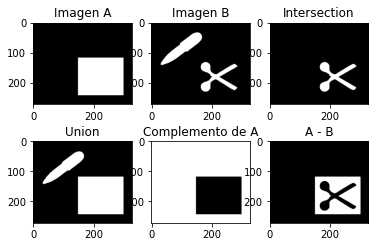

In [102]:
import matplotlib.pyplot as plt
import numpy as np

A = binaria(plt.imread("Imagenes9\\imagen2.jpg") / 255)
B = binaria(plt.imread("Imagenes9\\imagen3.jpg")[:, :, 1] / 255)


intersection = np.logical_and(A, B)
union = np.logical_or(A, B)
complement = np.logical_not(A)
diff = np.logical_and(A, np.logical_not(B))

fig, axs = plt.subplots(2, 3)
axs[0, 0].imshow(A, cmap='gray', vmin=0, vmax=1)
axs[0, 0].set_title("Imagen A")
axs[0, 1].imshow(B, cmap='gray', vmin=0, vmax=1)
axs[0, 1].set_title("Imagen B")
axs[0, 2].imshow(intersection, cmap='gray', vmin=0, vmax=1)
axs[0, 2].set_title("Intersection")

axs[1, 0].imshow(union, cmap='gray', vmin=0, vmax=1)
axs[1, 0].set_title("Union")
axs[1, 1].imshow(complement, cmap='gray', vmin=0, vmax=1)
axs[1, 1].set_title("Complemento de A")
axs[1, 2].imshow(diff, cmap='gray', vmin=0, vmax=1)
axs[1, 2].set_title("A - B")

plt.show()

### Dilatación <a class="anchor" id="dilate"></a>

In [103]:
pkg load image

A = [0 0 0 0 0;
     0 1 1 0 0;
     0 1 1 0 0;
     0 0 1 0 0;
     0 0 0 0 0];
     
B = strel('diamond', 1);
     
C = imdilate(A, B)

C =

   0   1   1   0   0
   1   1   1   1   0
   1   1   1   1   0
   0   1   1   1   0
   0   0   1   0   0



In [104]:
from skimage.morphology import square, rectangle, diamond, dilation

A = [[0, 0, 0, 0, 0],
     [0, 1, 1, 0, 0],
     [0, 1, 1, 0, 0],
     [0, 0, 1, 0, 0],
     [0, 0, 0, 0, 0]]

B = diamond(1)

C = dilation(A, B)

print(C)

[[0 1 1 0 0]
 [1 1 1 1 0]
 [1 1 1 1 0]
 [0 1 1 1 0]
 [0 0 1 0 0]]


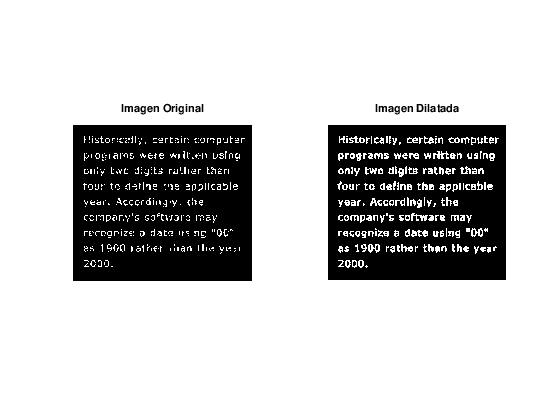

In [105]:
% dilatación en imagenes
pkg load image

A = imread('Imagenes9/imagen1.jpg');
A = im2double(A);
A = binaria(A);
subplot(1, 2, 1)
imshow(A)
title('Imagen Original')

B = strel('diamond', 1);
C = imdilate(A, B);

subplot(1, 2, 2)
imshow(C)
title('Imagen Dilatada')

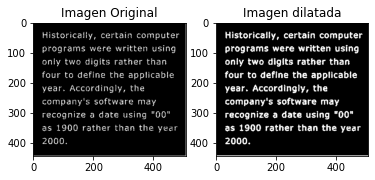

In [106]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import diamond, dilation

A = binaria(plt.imread("Imagenes9\\imagen1.jpg")[:, :, 1] / 255)

B = diamond(1)

C = dilation(A, B)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(A, vmin=0, vmax=1, cmap='gray')
ax1.set_title("Imagen Original")
ax2.imshow(C, vmin=0, vmax=1, cmap='gray')
ax2.set_title("Imagen dilatada")

plt.show()

### Erosión <a class="anchor" id="erode"></a>

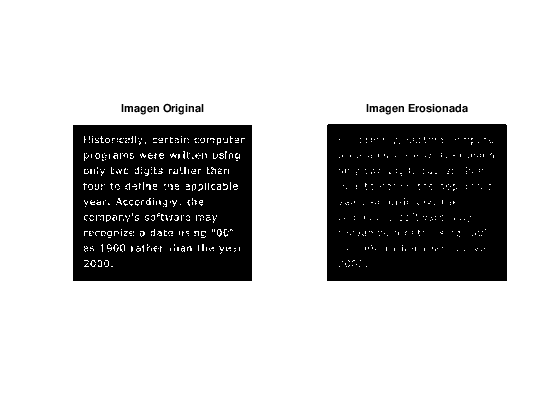

In [107]:
pkg load image

A = imread('Imagenes9/imagen1.jpg');
A = binaria(im2double(A));
subplot(1, 2, 1)
imshow(A)
title('Imagen Original')

B = strel('diamond', 1);
%B = ones(2, 2);
C = imerode(A, B);

subplot(1, 2, 2)
imshow(C)
title('Imagen Erosionada')

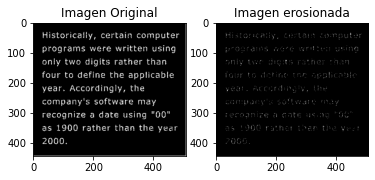

In [108]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import diamond, erosion

A = binaria(plt.imread("Imagenes9\\imagen1.jpg")[:, :, 1] / 255)

B = diamond(1)

C = erosion(A, B)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(A, vmin=0, vmax=1, cmap='gray')
ax1.set_title("Imagen Original")
ax2.imshow(C, vmin=0, vmax=1, cmap='gray')
ax2.set_title("Imagen erosionada")

plt.show()

### Apertura <a class="anchor" id="apertura"></a>

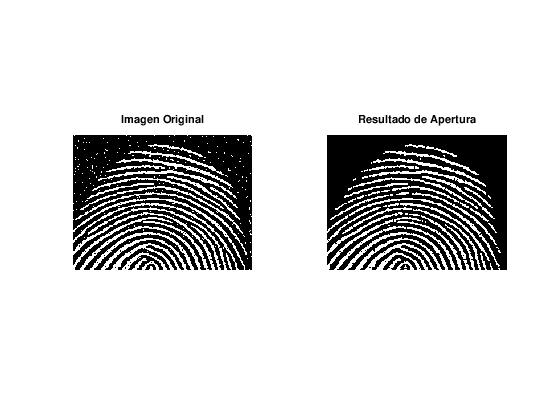

In [109]:
% apertura
pkg load image

A = imread('Imagenes9/imagen5.jpg');
A = binaria(im2double(A));
subplot(1, 2, 1)
imshow(A)
title('Imagen Original')

B = strel('diamond', 1);

% apertura morfologica de A por B
%C1 = imerode(A, B);
%C = imdilate(C1, B);
C = imopen(A, B);

subplot(1, 2, 2)
imshow(C)
title('Resultado de Apertura')

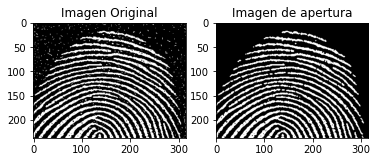

In [110]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import diamond, opening

A = binaria(plt.imread("Imagenes9\\imagen5.jpg")[:, :, 1] / 255)

B = diamond(1)

C = opening(A, B)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(A, vmin=0, vmax=1, cmap='gray')
ax1.set_title("Imagen Original")
ax2.imshow(C, vmin=0, vmax=1, cmap='gray')
ax2.set_title("Imagen de apertura")

plt.show()

### Algoritmos Morfológicos <a class="anchor" id="algo_morfo"></a>

#### Borde Interno <a class="anchor" id="borde_interno"></a>

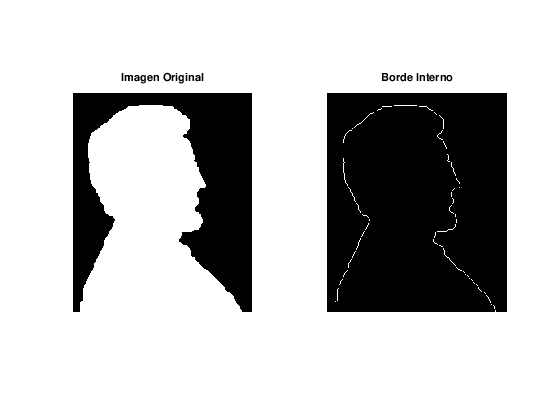

In [111]:
% Borde interno
pkg load image

A = imread('Imagenes9/imagen6.jpg');
A = binaria(im2double(A));
subplot(1, 2, 1)
imshow(A)
title('Imagen Original')

B = strel('diamond', 1);

% borde interno A - (A erode B)
C = imerode(A, B);
D = A&~C;
subplot(1, 2, 2)
imshow(D)
title('Borde Interno')

Text(0.5, 1.0, 'Borde Interno')

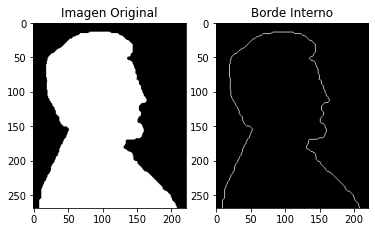

In [112]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import diamond, erosion

A = binaria(plt.imread("Imagenes9\\imagen6.jpg")[:, :, 1] / 255)

B = diamond(1)

C = erosion(A, B)
D = np.logical_and(A, np.logical_not(C))

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(A, vmin=0, vmax=1, cmap='gray')
ax1.set_title("Imagen Original")
ax2.imshow(D, vmin=0, vmax=1, cmap='gray')
ax2.set_title("Borde Interno")

#### Rellenar Huecos <a class="anchor" id="fill_holes"></a>

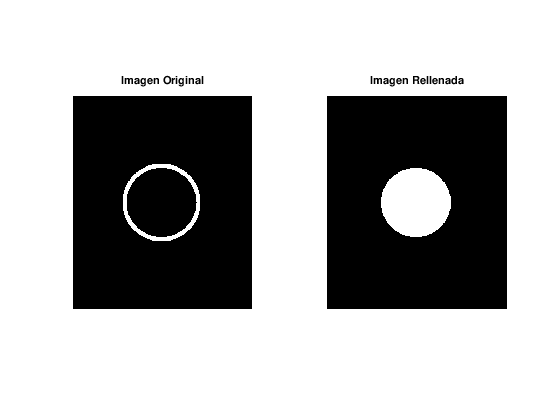

In [113]:
% rellenar huecos
pkg load image

A = imread('Imagenes9/imagen7.jpg');
A = binaria(im2double(A));
subplot(1, 2, 1)
imshow(A)
title('Imagen Original')

B = strel('diamond', 1);

% rellenar el hueco de la imagen
[m, n] = size(A);
X = zeros(m, n);
cx = floor(m/2); cy = floor(n/2);
X(cx, cy) = 1;

it = 100;

for k = 1:it
    C = imdilate(X, B);
    X = C&~A;
end

subplot(1, 2, 2)
imshow(X)
title('Imagen Rellenada')

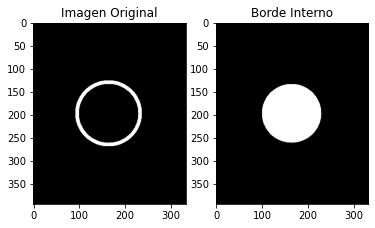

In [114]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import diamond, erosion, dilation

A = binaria(plt.imread("Imagenes9\\imagen7.jpg")[:, :, 1] / 255)

B = diamond(1)

m, n = A.shape
X = np.zeros((m, n))
cx = int(np.floor(m / 2))
cy = int(np.floor(n / 2))
X[cx, cy] = 1

it = 100

for _ in range(100):
    C = dilation(X, B)
    X = np.logical_and(C, np.logical_not(A))

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(A, vmin=0, vmax=1, cmap='gray')
ax1.set_title("Imagen Original")
ax2.imshow(X, vmin=0, vmax=1, cmap='gray')
ax2.set_title("Borde Interno")

plt.show()

#### Esqueleto <a class="anchor" id="skel"></a>

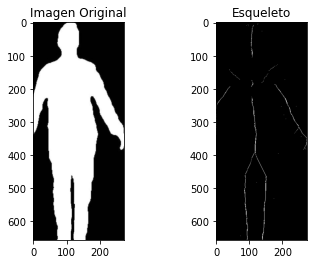

In [115]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

A = plt.imread('Imagenes9\\imagen9.jpg')
original = A

size = np.size(A)
skel = np.zeros(A.shape, np.uint8)

ret, A = cv2.threshold(A, 127, 255, 0)
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
done = False

while not done:
    eroded = cv2.erode(A, element)
    temp = cv2.dilate(eroded, element)
    temp = cv2.subtract(A, temp)
    skel = cv2.bitwise_or(skel, temp)
    A = eroded.copy()

    zeros = size - cv2.countNonZero(A)
    if zeros == size:
        done = True

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(original, cmap='gray')
ax1.set_title("Imagen Original")
ax2.imshow(skel, cmap='gray')
ax2.set_title("Esqueleto")

plt.show()

### Morfolofía en Imágenes a Escala de grises <a class="anchor" id="morfo_bnw"></a>

In [ ]:
pkg load image

% dilatacion y erosión

A = imread('Imagenes9/imagen11.jpg');
subplot(1, 3, 1)
imshow(A)
title('Imagen Original')

[m, n] = size(A);
C = uint8(zeros(m, n)); % imagen de salida.


% dilatación
#Bordes

disp('dil')
C(1,1)=max(max(A(1:2, 1:2)));
C(1,n)=max(max(A(1:2, n-1:n)));
C(m,1)=max(max(A(m-1:m, 1:2)));
C(m,n)=max(max(A(m-1:m, n-1:n)));

for x = 2: m-1
    C(x,1)=max(max(A(x-1:x+1, 1:2)));
    C(x,n)=max(max(A(x-1:x+1, n-1:n)));
endfor

for y = 2: n-1
    C(1,y)=max(max(A(1:2, y-1:y+1)));
    C(m,y)=max(max(A(m-1:m, y-1:y+1)));
endfor

for x = 2: m-1
    for y = 2: n-1
        C(x, y) = max(max(A(x-1:x+1, y-1:y+1)));
    endfor
endfor

subplot(1, 3, 2)
imshow(C)
title('Dilatacion')

% Erosión

disp('Erosion')
C(x,1)=min(min(A(1:2, 1:2)));
C(x,1)=min(min(A(1:2, n-1:n)));
C(x,1)=min(min(A(m-1:m, 1:2)));
C(x,1)=min(min(A(m-1:m, n-1:n)));

for x = 2: m-1
    C(x,1)=min(min(A(x-1:x+1, 1:2)));
    C(x,n)=min(min(A(x-1:x+1, n-1:n)));
endfor

for y = 2: n-1
    C(1,y)=min(min(A(1:2, y-1:y+1)));
    C(m,y)=min(min(A(m-1:m, y-1:y+1)));
endfor

for x = 2: m-1
    for y = 2: n-1
        D(x, y) = min(min(A(x-1:x+1, y-1:y+1)));
    endfor
endfor

subplot(1, 3, 3)
imshow(D)
title('Erosion')


(652, 473)


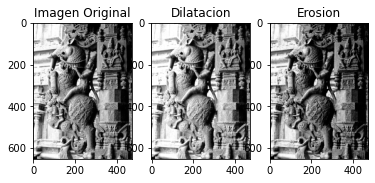

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

A = plt.imread("Imagenes9\\imagen11.jpg")

m, n = A.shape

C = np.zeros((m, n), dtype=np.uint8)

#Dilatacion
#Bordes
C[0,0]=np.amax(A[0:1, 0:1])
C[0,n-1]=np.amax(A[0:1, n-2:n-1])
C[m-1,0]=np.amax(A[m-2:m-1, 0:1])
C[m-1,n-1]=np.amax(A[m-2:m-1, n-2:n-1])

for x in range(1, m-1):
    C[x,1]=np.amax(A[x-1:x+1, 1:2])
    C[x,n-1]=np.amax(A[x-1:x+1, n-2:n-1])

for y in range(1, n-1):
    C[1,y]=np.amax(A[1:2, y-1:y+1])
    C[m-1,y]=np.amax(A[m-1:m, y-1:y+1])

for x in range(1, m - 1):
    for y in range(1, n - 1):
        C[x, y] = np.amax(A[x - 1:x + 1, y - 1:y + 1])

D = np.zeros((m, n), dtype=np.uint8)

#Erosion

#Bordes
D[0,0]=np.amin(A[0:1, 0:1])
D[0,n-1]=np.amin(A[1:2, n-2:n-1])
D[m-1,0]=np.amin(A[m-2:m-1, 0:1])
D[m-1,n-1]=np.amin(A[m-2:m-1, n-2:n-1])

for x in range(1, m-1):
    D[x,1]=np.amin(A[x-1:x+1, 1:2])
    D[x,n-1]=np.amin(A[x-1:x+1, n-2:n-1])

for y in range(1, n-1):
    D[1,y]=np.amin(A[1:2, y-1:y+1])
    D[m-1,y]=np.amin(A[m-2:m-1, y-1:y+1])

for x in range(1, m - 1):
    for y in range(1, n - 1):
        D[x, y] = np.amin(A[x - 1:x + 1, y - 1:y + 1])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(A, cmap='gray')
ax1.set_title("Imagen Original")
ax2.imshow(C, cmap='gray')
ax2.set_title("Dilatacion")
ax3.imshow(D, cmap='gray')
ax3.set_title("Erosion")

plt.show()

In [12]:
function C = dilatacion_grises(A)
    [m, n] = size(A);
    C = uint8(zeros(m, n)); % imagen de salida.
    C(1, :) = A(1, :);
    C(m, :) = A(m, :);
    C(:, 1) = A(:, 1);
    C(:, n) = A(:, n);


    % dilatación
    for x = 2: m-1
        for y = 2: n-1
            C(x, y) = max(max(A(x-1:x+1, y-1:y+1)));
        endfor
    endfor
end

In [13]:
function C = erosion_grises(A)
    [m, n] = size(A);
    C = uint8(zeros(m, n)); % imagen de salida.
    C(1, :) = A(1, :);
    C(m, :) = A(m, :);
    C(:, 1) = A(:, 1);
    C(:, n) = A(:, n);

    % erode
    for x = 2: m-1
        for y = 2: n-1
            %printf("%d, %d\n", x, y);
            C(x, y) = min(min(A(x-1:x+1, y-1:y+1)));
        endfor
    endfor
end

In [14]:
function C = apertura_grises(A)
    C1 = erosion_grises(A);
    C = dilatacion_grises(C1);
end

In [15]:
function C = clausura_grises(A)
    C1 = dilatacion_grises(A);
    C = erosion_grises(C1);
end

In [19]:
def dilatacion_grises(A):
    m, n = A.shape
    C = np.zeros(A.shape, dtype=np.uint8)
    C[0, :] = A[0, :]
    C[m - 1, :] = A[m - 1, :]
    C[:, 0] = A[:, 0]
    C[:, n - 1] = A[:, n - 1]

    for x in range(1, m - 2):
        for y in range(1, n - 2):
            C[x, y] = np.amax(A[x - 1:x + 1, y - 1:y + 1])

    return C


def erosion_grises(A):
    m, n = A.shape
    D = np.zeros((m, n), dtype=np.uint8)
    D[0, :] = A[0, :]
    D[m - 1, :] = A[m - 1, :]
    D[:, 0] = A[:, 0]
    D[:, n - 1] = A[:, n - 1]

    for x in range(1, m - 2):
        for y in range(1, n - 2):
            D[x, y] = np.amin(A[x - 1:x + 1, y - 1:y + 1])

    return D


def apertura_grises(A):
    C1 = erosion_grises(A)
    return dilatacion_grises(C1)


def clausura_grises(A):
    C1 = dilatacion_grises(A)
    return erosion_grises(C1)

#### Top hat y Bottom hat <a class="anchor" id="top_bottom"></a>

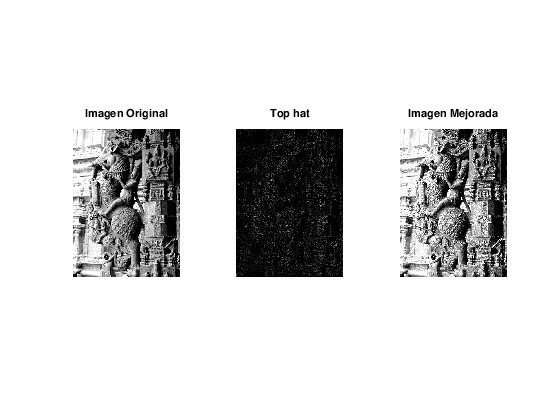

In [16]:
pkg load image

% top hat y bottom hat

A = imread('Imagenes9/imagen11.jpg');
subplot(1, 3, 1)
imshow(A)
title('Imagen Original')

% top hat
C1 = apertura_grises(A);
C = A -  C1;
subplot(1, 3, 2)
imshow(C)
title('Top hat')

% bottom hat
%D1 = clausura_grises(A);
%D = D1 - A;

% imagen con contraste mejorado
Z = A + C;

subplot(1, 3, 3)
imshow(Z)
title('Imagen Mejorada')

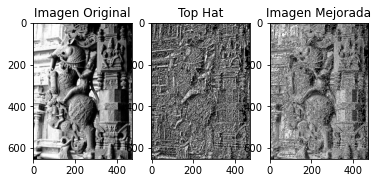

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt

A = plt.imread("Imagenes9/imagen11.jpg")

C1 = np.zeros((m, n), dtype=np.uint8)

#TopHat
C1=apertura_grises(A)
C=A-C1;
Z=A+C;

#Display
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(A, cmap='gray')
ax1.set_title("Imagen Original")
ax2.imshow(C, cmap='gray')
ax2.set_title("Top Hat")
ax3.imshow(Z, cmap='gray')
ax3.set_title("Imagen Mejorada")

plt.show()

## Transformada de Hough <a class="anchor" id="hough"></a>

### Transformada de Hough para imágenes binarias <a class="anchor" id="hough_bin"></a>

In [ ]:
pkg load image
% transformada de hough para imagenes binarias


A = imread('Imagenes10/linea1.jpg');
B = im2double(A);
% imagen binaria
B(B<0.5) = 0; B(B>=0.5) = 1;
% calcular discretizacion de theta y rho

%1. theta: toma valores en el intervalo [0, 180] / [0, pi]
h1 = 1;
thetas = deg2rad(0:h1:180);

%2 rho: toma valores en el intervalo [-d, d] donde d = sqrt(m^2 + n^2) y [m, n] = size(B)

[m, n] = size(B);
d = sqrt(m^2 + n^2);
h2 = 1;
rhos = -d:h2:d;

% crear matriz de acumulación
acumulador = zeros(length(thetas), length(rhos));

% llenar la matriz de acumulación
[x_b, y_b] = find(B);

for i = 1:length(x_b) % recorrer los puntos del borde
    for theta_ind = 1:length(thetas)
        theta = thetas(theta_ind);
        rho = x_b(i)*cos(theta) + y_b(i)*sin(theta);
        [~, rho_ind] = min(abs(rhos-rho));
        acumulador(theta_ind, rho_ind) += 1;
    end
end

%figure
%surface(thetas, rhos, acumulador', 'EdgeColor', 'none')
%xlabel('rho')
%ylabel('theta')

% encontrar la posición donde el acumulador alcanza el máximo

[xp, yp] = find(acumulador == max(max(acumulador)));

% graficar
thetaMax = thetas(xp);
rhoMax = rhos(xp);

pendiente = -cos(thetaMax) / sin(thetaMax);
interseccion = rhoMax / sin(thetaMax);

% para graficar una linea recta, se utiliza el comando line.
% necesitamos dos puntos 
% punto 1 (1, y1)
y1 = pendiente*1 + interseccion;

%punto 2 (xn, n)
xn = (n - interseccion) / pendiente;

% graficar la linea
line([y1 n], [1 xn], 'lineWidth', 2)


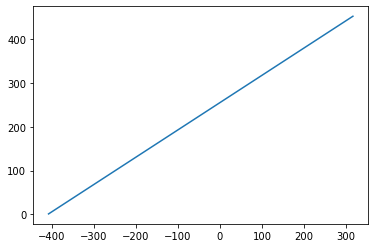

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
A = cv2.imread("Imagenes10/linea1.jpg",0)
#Transformar imagen en binaria
B = A
B=np.where(B<20,0,1)
#Calcular Theta y Rho
#Theta
thetas=[]
for i in range(180):
    thetas.append(np.deg2rad(i))
#Rho
m, n = B.shape
d=np.sqrt(m**2+n**2)
h=-d
rhos=[]
while(True):
    if(h>d):
        break
    rhos.append(h)
    h+=1;
#Matriz de acumulacion
acumulador=np.zeros([len(thetas),len(rhos)])

(xb, yb) = B.nonzero()
for i in range(len(xb)):
    for theta_ind in range(len(thetas)):
        theta=thetas[theta_ind]
        rho = xb[i]*np.cos(theta) + yb[i]*np.sin(theta)
        rho_ind=np.where(rhos-rho == np.amin(abs(rhos-rho)))
        acumulador[theta_ind,rho_ind] +=1;

xp, yp =np.where(acumulador == np.amax(acumulador))
thetaMax = thetas[xp[0]];
rhoMax = rhos[xp[0]];

pendiente = -np.cos(thetaMax) / np.sin(thetaMax);
interseccion = rhoMax / np.sin(thetaMax);

y1 = pendiente*1 + interseccion;

xn = (n - interseccion) / pendiente;

plt.plot([y1, n],[1, xn])
plt.show()

In [ ]:
pkg load image
% transformada de hough para imagenes binarias

A = imread('Imagenes10/linea3.jpg');
B = im2double(A);
% imagen binaria
B(B<0.5) = 0; B(B>=0.5) = 1;
%imshow(B)
% calcular discretizacion de theta y rho

%1. theta: toma valores en el intervalo [0, 180] / [0, pi]
h1 = 1;
thetas = deg2rad(0:h1:180);

%2 rho: toma valores en el intervalo [-d, d] donde d = sqrt(m^2 + n^2) y [m, n] = size(B)

[m, n] = size(B);
d = sqrt(m^2 + n^2);
h2 = 1;
rhos = -d:h2:d;

% crear matriz de acumulación
acumulador = zeros(length(thetas), length(rhos));

% llenar la matriz de acumulación
[x_b, y_b] = find(B);

for i = 1:length(x_b) % recorrer los puntos del borde
    for theta_ind = 1:length(thetas)
        theta = thetas(theta_ind);
        rho = x_b(i)*cos(theta) + y_b(i)*sin(theta);
        [~, rho_ind] = min(abs(rhos-rho));
        acumulador(theta_ind, rho_ind) += 1;
    end
end

%figure
%surface(thetas, rhos, acumulador', 'EdgeColor', 'none')
%xlabel('rho')
%ylabel('theta')

lineas_intentos=10;

for r=1:lineas_intentos
  %Encontrar máxima posicion del Acumulador
  [xp,yp]=find(acumulador==max(max(acumulador)));
  %Observacion: Si el máximo se repite más de una vez, entonces 
  %             'x' y 'y' son vectores que tienen las posiciones

  %Graficar

  for k=1:length(xp)
    thetaMax=thetas(xp(k));
    rhoMax=rhos(yp(k));

    if abs(sin(thetaMax))<10^-4
      x_v=rhoMax/cos(thetaMax);
      line([n 1], [x_v x_v],'LineWidth',2)  
    else
      %Calcular pendiente
      pendiente=-cos(thetaMax)/sin(thetaMax);
      interseccion=rhoMax/sin(thetaMax);
      %Necesitamos el punto (1,y1)
      y1=pendiente*1+interseccion;
      %Necesitamos el punto (m,ym)
      ym=pendiente*m+interseccion;
      %Necesitamos el punto (x1,1)
      x1=(1-interseccion)/pendiente;
      %Necesitamos el punto (xn,n)
      xn=(n-interseccion)/pendiente;
      if pendiente>0
        if 0<y1
          line([y1 n], [1 xn],'LineWidth',2)  
        else
          line([1 ym], [x1 m],'LineWidth',2)  
        end    
      else
        if y1>m
          line([ym n], [m xn],'LineWidth',2)  
        else
          line([y1 1], [1 x1],'LineWidth',2)  
        end    
      end  
    end
    acumulador(xp(k),yp(k))=0;
  end
end



In [ ]:
print("test")
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#%%%%%%%%%%%%%%%%% F A L T A %%%%%%%%%%%%%%%%%%
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

#lo anterior en python

### Transformada de Hough para imágenes a escala de grises <a class="anchor" id="hough_gray"></a>

In [ ]:
% transformada de hough para imagenes en escala de grises

pkg load image

% 0. cargar imagen
A = imread('Imagenes10/cuadro.jpg');
A = imresize(A, floor(size(A)/2));

% 1. obtener imagen binaria con los bordes de la imagen original.
A = im2double(A);

Bx = [-1 0 1; -2 0 2; -1 0 1];
By = [-1 -2 -1; 0 0 0; 1 2 1];

% realizar convolucion
Cx = conv2(A, Bx, 'same');
Cy = conv2(A, By, 'same');
C = sqrt(Cx.^2+Cy.^2);

%convertir a binario.
C(C<0.5) = 0; C(C>=0.5) = 1;

B = C;

%1. theta: toma valores en el intervalo [0, 180] / [0, pi]
h1 = 1;
thetas = deg2rad(0:h1:180);

%2 rho: toma valores en el intervalo [-d, d] donde d = sqrt(m^2 + n^2) y [m, n] = size(B)

[m, n] = size(B);
d = sqrt(m^2 + n^2);
h2 = 1;
rhos = -d:h2:d;

% crear matriz de acumulación
acumulador = zeros(length(thetas), length(rhos));

% llenar la matriz de acumulación
[x_b, y_b] = find(B);

for i = 1:length(x_b) % recorrer los puntos del borde
    % por aquí se cambia en la tarea.
    for theta_ind = 1:length(thetas)
        theta = thetas(theta_ind);
        rho = x_b(i)*cos(theta) + y_b(i)*sin(theta);
        [~, rho_ind] = min(abs(rhos-rho));
        acumulador(theta_ind, rho_ind) += 1;
    end
end

%figure
%surface(thetas, rhos, acumulador', 'EdgeColor', 'none')
%xlabel('rho')
%ylabel('theta')

lineas_intentos=20;

for r=1:lineas_intentos
  %Encontrar máxima posicion del Acumulador
  [xp,yp]=find(acumulador==max(max(acumulador)));
  %Observacion: Si el máximo se repite más de una vez, entonces 
  %             'x' y 'y' son vectores que tienen las posiciones

  %Graficar

  for k=1:length(xp)
    thetaMax=thetas(xp(k));
    rhoMax=rhos(yp(k));

    if abs(sin(thetaMax))<10^-4
      x_v=rhoMax/cos(thetaMax);
      line([n 1], [x_v x_v],'LineWidth',2)  
    else
      %Calcular pendiente
      pendiente=-cos(thetaMax)/sin(thetaMax);
      interseccion=rhoMax/sin(thetaMax);
      %Necesitamos el punto (1,y1)
      y1=pendiente*1+interseccion;
      %Necesitamos el punto (m,ym)
      ym=pendiente*m+interseccion;
      %Necesitamos el punto (x1,1)
      x1=(1-interseccion)/pendiente;
      %Necesitamos el punto (xn,n)
      xn=(n-interseccion)/pendiente;
      if pendiente>0
        if 0<y1
          line([y1 n], [1 xn],'LineWidth',2)  
        else
          line([1 ym], [x1 m],'LineWidth',2)  
        end    
      else
        if y1>m
          line([ym n], [m xn],'LineWidth',2)  
        else
          line([y1 1], [1 x1],'LineWidth',2)  
        end    
      end  
    end
    acumulador(xp(k),yp(k))=0;
  end
end



In [ ]:
print("test")
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#%%%%%%%%%%%%%%%%% F A L T A %%%%%%%%%%%%%%%%%%
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

#lo anterior en python

## Segmentación de Imágenes <a class="anchor" id="segmentation"></a>

### Umbral simple y compuesto <a class="anchor" id="threshold"></a>

In [ ]:
% ejemplo de umbral
pkg load image

A = imread('Imagenes11/imagen1.jpg');
subplot(1, 3, 1)
imshow(A)
title('Imagen Binaria')

A = im2double(A); [m, n] = size(A);

%umbral simple
T = 0.5; B = zeros(m, n);
B(A>T) = 1; 
B(A<T) = 0;

subplot(1, 3, 2)
imshow(B)
title('Umbral simple')

%umbral compuesto
T1 = 1/3; T2 = 2/3; C = zeros(m, n);
C(A>T) = 1; %[0.66, 1]
C(and(T1<A, A<=T2)) = 0.5; %[0.333, 0.666[
C(A<=T1) = 0; %[0, 0.333]

subplot(1, 3, 3)
imshow(C)
title('Umbral compuesto')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

A = plt.imread("Imagenes11\\imagen1.jpg") / 255

T = 0.5
B = np.zeros(A.shape)
B[A > T] = 1

T1 = 1/3
T2 = 2/3
C = np.zeros(A.shape)
C[A > T] = 1
C[np.logical_and(T1 < A, A <= T2)] = 0.5
C[A<=T1] = 0

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(A, cmap='gray')
ax1.set_title("Imagen Original")
ax2.imshow(B, cmap='gray')
ax2.set_title("Imagen umbral simple")
ax3.imshow(C, cmap='gray', vmin=0, vmax=1)
ax3.set_title("Imagen umbral compuesto")
plt.show()


### Umbral e histogramas <a class="anchor" id="thresh_hist"></a>

In [ ]:
% umbral e histograma

pkg load image

A = imread('Imagenes11/imagen2.jpg');
A = im2double(A);
subplot(2, 3, 1)
imshow(A)
title('Imagen Original')

%histograma imagen original
subplot(2, 3, 4)
imhist(A)
title('Histograma imagen original')

% ruido 1
a1 = 0.2^2;
B1 = A + a1*randn(size(A));

subplot(2, 3, 2)
imshow(B1)
title('Imagen con ruido 1')

subplot(2, 3, 5)
imhist(B1)
title('Histograma imagen ruido')

% ruido 2
a2 = 0.5^2;
B2 = A + a2*randn(size(A));

subplot(2, 3, 3)
imshow(B1)
title('Imagen con ruido 2')

subplot(2, 3, 6)
imhist(B2)
title('Histograma imagen ruido')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

A = plt.imread("Imagenes11\\imagen2.jpg")[:, :, 0] / 255

a1 = 0.2**2
B1 = A + np.multiply(a1, np.random.normal(0, 1, A.shape))

a2 = 0.5**2
B2 = A + np.multiply(a2, np.random.normal(0, 1, A.shape))

fig, axs = plt.subplots(2, 3)
axs[0, 0].imshow(A, cmap='gray', vmin=0, vmax=1)
axs[0, 0].set_title("Imagen A")
axs[0, 1].imshow(B1, cmap='gray')
axs[0, 1].set_title("Imagen con ruido 1")
axs[0, 2].imshow(B2, cmap='gray')
axs[0, 2].set_title("Imagen con ruido 2")

axs[1, 0].hist(A.ravel(), bins=256)
axs[1, 0].set_title("Histograma Original")
axs[1, 1].hist(B1.ravel(), bins=256)
axs[1, 1].set_title("Histograma imagen con ruido 1")
axs[1, 2].hist(B2.ravel(), bins=256)
axs[1, 2].set_title("Histograma imagen con ruido 2")
plt.show()


In [ ]:
disp("test")
% METODO DEL UMBRAL GLOBAL BÁSICO.

pkg load image

A = imread('Imagenes11/imagen3.jpg');
A = im2double(A);
subplot(2, 2, 1)
imshow(A)
title('Imagen Original')

subplot(2, 2, 2)
imhist(A)
title('Histograma Original')

[x, y] = imhist(A);
ylim([0 max(x)])

% método 1: umbral simple (binario)
T = 0.5;
[m, n] = size(A);
C1 = zeros(m, n);
C1(A>T) = 1;

subplot(2, 2, 3)
imshow(C1)
title(['Umbral con T=' num2str(T)])

% Método 2: umbral global básico
iter = 15;
for i = 1: iter
    % P1. dividir la imagen en 2 bloques.
    B1 = (A>T); B2 = (A<=T);
    %Calcular el promedio de intensidad de cada bloque.
    sum1 = sum(sum(B1)); sum2 = sum(sum(B2));
    G1 = zeros(m, n); G2 = zeros(m, n);
    
    % G1 tiene los pixeles que cumple A>T, G2 tiene A <= T
    G1 = A.*B1; G2 = A.*B2;
    
    m1 = sum(sum(G1)) / sum1; m2 = sum(sum(G2)) / sum2;
    T = 0.5*(m1 + m2);
end

C2 = zeros(m, n);
C2(A>T) = 1;

subplot(2, 2, 4)
imshow(C2)
title(['Umbral con T=' num2str(T)])


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

A = plt.imread("Imagenes11\\imagen3.jpg") / 255

# Umbral simple
T = 0.5
C1 = np.zeros(A.shape)
C1[A > T] = 1

# umbral global básico
itert = 15
for _ in range(itert):
    B1 = A > T
    B2 = A <= T
    sum1 = sum(sum(B1))
    sum2 = sum(sum(B2))
    G1 = np.multiply(A, B1)
    G2 = np.multiply(A, B2)
    m1 = sum(sum(G1)) / sum1
    m2 = sum(sum(G2)) / sum2
    T = 0.5*(m1 + m2)

C2 = np.zeros(A.shape)
C2[A > T] = 1

fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(A, cmap='gray')
axs[0, 0].set_title("Imagen A")
axs[0, 1].hist(A.ravel(), bins=256)
axs[0, 1].set_title("Histogram Original")
axs[1, 0].imshow(C1, cmap='gray')
axs[1, 0].set_title("Umbral = 0.5")
axs[1, 1].imshow(C2, cmap='gray')
axs[1, 1].set_title("Umbral = " + str(T))

plt.show()

### Umbral Otsu <a class="anchor" id="otsu"></a>

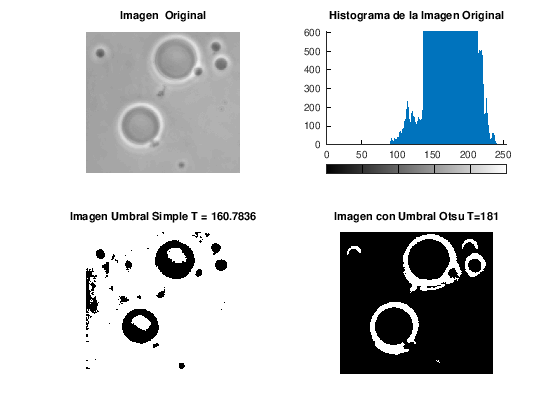

In [4]:
pkg load image

clc; clear; close all;
pkg load image;

A = imread('Imagenes11/imagen4.jpg');
subplot(2, 2, 1);
imshow(A);
title('Imagen  Original');

[m, n] = size(A);

subplot(2, 2, 2);
imhist(A);
title('Histograma de la Imagen Original');

% Umbral Básico Global
T = 100; 
iter = 15;

for k = 1:iter

    % Máscaras de los Bloques
    
    I1 = (A > T);  
    I2 = (A <= T); 
    
    B1 = A .* I1;
        
    B2 = A .* I2; 
                  
    m1 = sum(sum(B1)) / sum(sum(I1));          
    m2 = sum(sum(B2)) / sum(sum(I2));        
    
    T = 0.5 * (m1 + m2);
    
endfor

C = zeros(m, n);

C(A > T) = 1;
C(A <= T) = 0;
subplot(2, 2, 3);
imshow(C);
title(['Imagen Umbral Simple T = ' num2str(T)]);


% Umbral Método de Otsu%

% Paso 0: Calcular el histograma de A
[q, ~] = imhist(A);

% Paso 1: Calcular el histograma normalizado
h = (1 / (m * n)) * q;

% Paso 2: Calcular Vector de suma acumulada
p = zeros(256, 1);
for k = 1:256
    p(k) = sum(h(1:k));
end

% Paso 3: Calcular Vector de suma acumulada con peso
mc = zeros(256, 1);
for k = 1:256
    mc(k) = sum((0:k-1)' .* h(1:k));
end

% Paso 4: Calcular el maximo del vector mc
mg = mc(256);

% Paso 5: Calcular vecto e varianza entre clases
N = (mg * p - mc) .^ 2;
D = p .* (1 - p);
delta2b = N ./ D;

% Paso 6: Posicion Maxima de el vector delta2b
[~, T] = max(delta2b); % [1 2 3 4 ... 256]
T = T - 1; % [0 1 2 3 ... 255]

% Mostrar imagen
D = zeros(m, n);
D(A > T) = 1;
D(A <= T) = 0;
subplot(2, 2, 4);
imshow(D);
title(['Imagen con Umbral Otsu T=' num2str(T)])

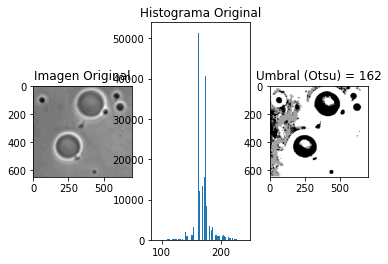

In [1]:
import matplotlib.pyplot as plt
import numpy as np

A = plt.imread("Imagenes11\\imagen4.jpg")[:, :, 0]

pixel_number = A.shape[0] * A.shape[1]
mean_weigth = 1.0/pixel_number
his, bins = np.histogram(A.ravel(), np.array(range(0, 256)))
final_thresh = -1
final_value = -1
for t in bins[1:-1]: # This goes from 1 to 254 uint8 range (Pretty sure wont be those values)
    Wb = np.sum(his[:t]) * mean_weigth
    Wf = np.sum(his[t:]) * mean_weigth

    mub = np.mean(his[:t])
    muf = np.mean(his[t:])

    value = Wb * Wf * (mub - muf) ** 2

    if value > final_value:
        final_thresh = t
        final_value = value
B = A.copy()
B[A > final_thresh] = 255
B[A < final_thresh] = 0

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(A, cmap='gray')
ax1.set_title("Imagen Original")
ax2.hist(A.ravel(), bins=256)
ax2.set_title("Histograma Original")
ax3.imshow(B, cmap='gray')
ax3.set_title("Umbral (Otsu) = " + str(final_thresh))
plt.show()

plt.show()

## Compresión de Imágenes <a class="anchor" id="compression"></a>

In [9]:
function x=mat2vect_diag(C)
  [n,~]=size(C);

  x=[C(1,1)]; s=sum(sum(abs(C)));

  %Primeras n diagonales
  for i=2:n
    for j=1:i
      if mod(i,2)==0
         x=[x C(j,i-j+1)];
      else     
         x=[x C(i-j+1,j)];
      end  
    end  
    if sum(abs(x))==s
      break
    end    
  end

  if mod(n,2)==1
    in=1; fin=n-1; pp=0;
  else
    in=2; fin=n; pp=1;
  end

  %Segundas Diagonales
  for i=1:n-1
    if sum(abs(x))==s
      break
    end  
    k=1;
    for j=i+1:n
      if mod(i,2)==pp
         x=[x C(n-k+1,j)];
      else     
         x=[x C(j,n-k+1)];
      end 
      k=k+1; 
    end  
  end
end

In [2]:
import numpy as np


def mat2vect_diag(C):
    n, _ = C.shape
    x=[C[1,1]]
    s=np.sum(abs(C))
    #Primeras n diagonales
    for i in range(1,n-2):
        for j in range(0,i):
            if i%2 ==0:
                x.append(C[j,i-j+1])
            else:
                x.append(C(i-j+1,j))
        if np.sum(abs(x))==s:
            break
    if (n%2)==1:
        in_=1
        fin=n-1
        pp=0
    else:
        in_=2
        fin=n
        pp=1
    #Segundas diagonales
    for i in range(0,n-2):
        if sum(abs(x))==s:
            break
        k=1
        for j in range(i+1,n-1):
            if i%2==1:
                x.append(C[n-k+1,j])
            else:
                x.append(C[j,n-k])
    return C

In [8]:
function C=vect2mat_diag(x)
  t=length(x); n=8; C=zeros(n);
  k=1; C(1,1)=x(k);
  %Primeras n diagonales
  for i=2:n
    for j=1:i
      k=k+1;
      if mod(i,2)==0
         C(j,i-j+1)=x(k);
      else     
         C(i-j+1,j)=x(k);
      end 
    end  
    if t==k
      break
    end    
  end
  %Segundas Diagonales
  for i=1:n-1     
    r=1;
    if t==k
      break
    end
    for j=i+1:n
      k=k+1;     
      if mod(i,2)==1
         C(n-r+1,j)=x(k);
      else     
         C(j,n-r+1)=x(k);
      end 
      r=r+1;
      if t==k
        break
      end  
    end    
  end
end



In [5]:
def vact2mat_diag(x):
    t = len(x)-1
    n=8
    C = np.zeros((n,n))
    k=0
    C[0,0] = x[k]
    #Primeras n diagonales
    for i in range(1,n):
        for j in range(0,i):
            k=k+1
            if i%2 ==0:
                C[j-1,i-j] = x[k]
            else:
                C[i-j,i-1]=x[k]
        if t==k:
            break
    #Segundas diagonales
    for i in range(0,n-2):
        r=1
        if t == k:
            break
        for j in range(i,n-1):
           k=k+1
           if i%2==1:
               C[n-r,j-1] = x[k]
           else:
               C[j-1,n-r]=x[k]
           r+=1
           if t ==k:
               break
    
    return C

In [10]:
% ejemplo 1 de método jpeg
pkg load signal;

%%% P1 - COMPRESIÓN %%%

%matriz de tamaño 8x8
A=[154 123 123 123 123 123 123 136;
   192 180 136 154 154 154 136 110;
   254 198 154 154 180 154 123 123;
   239 180 136 180 180 166 123 123;
   180 154 136 167 166 149 136 136;
   128 136 123 136 154 180 198 154;
   123 105 110 149 136 136 180 166;
   110 136 123 123 123 136 154 136];
   
% paso 1: restar 128 a cada entrada
M = A - 128;

% paso 2: calcular la DCT-2D
D = dct2(M);

% paso 3: obtener matriz cuantificada (MATRIZ DEL 50%
Q = [16 11 10 16 24 40 51 61;
   12 12 14 19 26 58 60 55;
   14 13 16 24 40 57 59 56;
   14 17 22 29 51 87 80 62;
   18 22 37 56 68 109 103 77;
   24 35 55 64 81 104 113 92;
   49 64 78 87 103 121 120 101;
   72 92 95 98 112 100 103 99];
   
C = round(D./Q);

% paso 4: codificar matriz C en vector x
x = mat2vect_diag(C);


%%% P2 - RECONSTRUCCIÓN %%%

% paso 1: convertir x en una matriz de 8x8
Cr = vect2mat_diag(x);

% paso 2: multiplicar puntualmente Cr y Q
M = Cr.*Q;

% paso 3: calcular la inversa de DCT-2D a M
P = idct2(M);

% paso 4: redondear P y sumar 128 a cada entrada
Ar = round(P) + 128;

In [ ]:
% ejemplo 2 de método jpeg
pkg load signal;

%matriz de tamaño 8x8
A=[154 123 123 123 123 123 123 136;
   192 180 136 154 154 154 136 110;
   254 198 154 154 180 154 123 123;
   239 180 136 180 180 166 123 123;
   180 154 136 167 166 149 136 136;
   128 136 123 136 154 180 198 154;
   123 105 110 149 136 136 180 166;
   110 136 123 123 123 136 154 136];
   
%%% P1 - COMPRESIÓN %%%
   
% paso 1: restar 128 a cada entrada
M = A - 128;

% paso 2: calcular la DCT-2D
D = dct2(M);

% paso 3: obtener matriz cuantificada (MATRIZ DEL 50%
Q = [16 11 10 16 24 40 51 61;
   12 12 14 19 26 58 60 55;
   14 13 16 24 40 57 59 56;
   14 17 22 29 51 87 80 62;
   18 22 37 56 68 109 103 77;
   24 35 55 64 81 104 113 92;
   49 64 78 87 103 121 120 101;
   72 92 95 98 112 100 103 99];
   
n = 100;
if n == 100
    Q = ones(8); 
elseif n > 50
    Q = ((100-n)/50)*Q;
else
    Q = (50/n)*Q;
endif
   
C = round(D./Q);

% paso 4: codificar matriz C en vector x
x = mat2vect_diag(C);


%%% P2 - RECONSTRUCCIÓN %%%

% paso 1: convertir x en una matriz de 8x8
Cr = vect2mat_diag(x);

% paso 2: multiplicar puntualmente Cr y Q
M = Cr.*Q;

% paso 3: calcular la inversa de DCT-2D a M
P = idct2(M);

% paso 4: redondear P y sumar 128 a cada entrada
Ar = round(P) + 128

In [ ]:
from scipy.fftpack import dct, idct

def absol(X):
    r=np.array([])
    for i in X:
        r+=abs(i)
    return r 

A=np.array([[154, 123, 123, 123, 123, 123, 123, 136],
   [192, 180, 136, 154, 154, 154, 136, 110],
   [254, 198, 154, 154, 180, 154, 123, 123],
   [239, 180, 136, 180, 180, 166, 123, 123],
   [180, 154, 136, 167, 166, 149, 136, 136],
   [128, 136, 123, 136, 154, 180, 198, 154],
   [123, 105, 110, 149, 136, 136, 180, 166],
   [110, 136, 123, 123, 123, 136, 154, 136]])

M = A-128

D = dct(M)

Q = np.array([[16, 11, 10 ,16, 24 ,40, 51, 61],
              [12, 12, 14, 19, 26, 58, 60, 55],
              [14, 13, 16, 24, 40, 57, 59, 56],
              [14, 17, 22, 29, 51, 87, 80 ,62],
              [18, 22, 37, 56, 68, 109, 103, 77],
              [24, 35, 55, 64, 81, 104, 113 ,92],
              [49, 64, 78, 87, 103, 121, 120, 101],
              [72, 92, 95, 98, 112, 100 ,103 ,99]])

C =(D/Q)

x =  mat2vect_diag(C)

Cr = vact2mat_diag(x)

M = Cr @ Q
P = idct(M)

Ar = P + 128

In [ ]:
pkg load signal

function x = jpeg_compression(A, comp)
    M = A - 128;

    % paso 2: calcular la DCT-2D
    D = dct2(M);

    % paso 3: obtener matriz cuantificada (MATRIZ DEL 50%
    Q = [16 11 10 16 24 40 51 61;
       12 12 14 19 26 58 60 55;
       14 13 16 24 40 57 59 56;
       14 17 22 29 51 87 80 62;
       18 22 37 56 68 109 103 77;
       24 35 55 64 81 104 113 92;
       49 64 78 87 103 121 120 101;
       72 92 95 98 112 100 103 99];

    if comp == 100
        Q = ones(8); 
    elseif comp > 50
        Q = ((100-comp)/50)*Q;
    else
        Q = (50/comp)*Q;
    endif

    C = round(D./Q);

    % paso 4: codificar matriz C en vector x
    x = mat2vect_diag(C);
    x;
endfunction

In [ ]:
def jpg_compresion(A, comp):
    M = A - 128
    D = dct(M)
    Q = np.array([[16, 11, 10 ,16, 24 ,40, 51, 61],
              [12, 12, 14, 19, 26, 58, 60, 55],
              [14, 13, 16, 24, 40, 57, 59, 56],
              [14, 17, 22, 29, 51, 87, 80 ,62],
              [18, 22, 37, 56, 68, 109, 103, 77],
              [24, 35, 55, 64, 81, 104, 113 ,92],
              [49, 64, 78, 87, 103, 121, 120, 101],
              [72, 92, 95, 98, 112, 100 ,103 ,99]])
    
    if comp == 100:
        Q = np.ones(8)
    elif comp > 50:
        Q = ((100-comp)/50)*Q
    else:
        Q = (50/comp)*Q
        
    C = D/Q
    
    x = mat2vect_diag(C)
    
    return x

In [ ]:
pkg load signal

function A_r = jpeg_decompression(x, comp)
    % paso 1: convertir x en una matriz de 8x8
    Cr = vect2mat_diag(x);
    
    Q = [16 11 10 16 24 40 51 61;
           12 12 14 19 26 58 60 55;
           14 13 16 24 40 57 59 56;
           14 17 22 29 51 87 80 62;
           18 22 37 56 68 109 103 77;
           24 35 55 64 81 104 113 92;
           49 64 78 87 103 121 120 101;
           72 92 95 98 112 100 103 99];

    if comp == 100
        Q = ones(8); 
    elseif comp > 50
        Q = ((100-comp)/50)*Q;
    else
        Q = (50/comp)*Q;
    endif

    % paso 2: multiplicar puntualmente Cr y Q
    M = Cr.*Q;

    % paso 3: calcular la inversa de DCT-2D a M
    P = idct2(M);

    % paso 4: redondear P y sumar 128 a cada entrada
    A_r = round(P) + 128;
    A_r;
endfunction

In [ ]:
def jpeg_decompression(x, comp)
    % paso 1: convertir x en una matriz de 8x8
    Cr = vect2mat_diag(x);
    
    Q = [16 11 10 16 24 40 51 61;
           12 12 14 19 26 58 60 55;
           14 13 16 24 40 57 59 56;
           14 17 22 29 51 87 80 62;
           18 22 37 56 68 109 103 77;
           24 35 55 64 81 104 113 92;
           49 64 78 87 103 121 120 101;
           72 92 95 98 112 100 103 99];

    if comp == 100
        Q = np.ones(8); 
    elseif comp > 50
        Q = ((100-comp)/50)*Q;
    else
        Q = (50/comp)*Q;
    endif


    M = Cr.*Q;


    P = idct2(M);


    A_r = P + 128;
    return A_r,r

In [ ]:
% Ejemplo de compresión con imágenes
pkg load signal
pkg load image

A = imread('Imagenes12/lena.jpg');
subplot(1, 2, 1)
imshow(A)
title('Imagen Original')

A = double(A);

% paso 1: compresión
[m, ~] = size(A);

k = m/8; % la imagen tiene kxk bloques de 8x8

C = cell(k, k); % arreglo que contiene en cada entrada el vector comprimido de cada bloque.

comp = 50;

num_pix = 0; % debe dar 39056

for i = 1:k
    for j = 1:k
        Bloque = A(8*(i-1) + 1:8*i, 8*(j-1)+1:8*j); % obtener los bloques 8x8
        x = jpeg_compression(Bloque, comp);
        C(i, j) = x;
        num_pix = num_pix + length(x); 
    end
end

num_pix

% paso 2 reconstrucción
A_r = zeros(128, 128);

for i = 1:k
    for j = 1:k
        x = cell2mat(C(i, j));
        Aux = jpeg_decompression(x, comp);
        A_r(8*(i-1) + 1:8*i, 8*(j-1)+1:8*j) = Aux;
    end
end

A_r = uint8(A_r);
subplot(1, 2, 2)
imshow(A_r)
title('Imagen Reconstruida')

In [ ]:
A = plt.imread("Imagenes12\\lena.jpg")



m, _ =  A.shape

k = m/8;

C = cell(k, k)

comp = 50;

for i in range(0,k-1):
    for j in range (0,k-1):
        Bloque = A[8*(i-1) + 1:8*i, 8*(j-1)+1:8*j]
        x = jpeg_compression(Bloque, comp)
        C[i, j] = x
        num_pix = num_pix + len(x)

A_r = np.zeros(128, 128);

for i in range(0,k-1):
    for j in range (0,k-1):
        x = cell2mat(C[i, j])
        Aux = jpeg_decompression(x, comp)
        A_r(8*(i-1) + 1:8*i, 8*(j-1)+1:8*j) = Aux